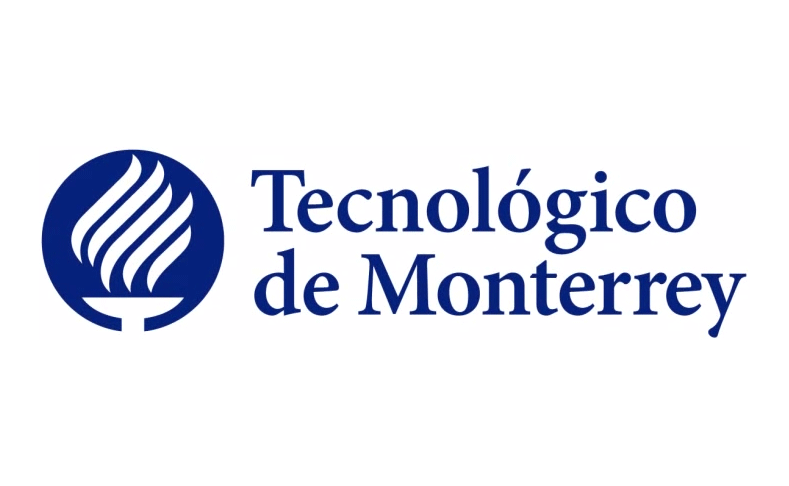

#**Maestría en Inteligencia Artificial Aplicada**

##**Materia:** Proyecto Integrador

**Profesor titular:** Dra. Grettel Barceló Alonso / Dr. Luis Eduardo Falcón Morales

**ASESOR - PROYECTO INTEGRADOR ABR25**  
Dr. Carlos Villaseño

<br><br>
**Equipo 10**  
David García Robles - A01152606  
David Nava Jiménez - A01168501  
José Antonio Hernández Hernández - A01381334  


#**Carga de librerías y visualización inicial del DataFrame**

In [4]:
#from google.colab import drive
#drive.mount('/content/drive')

In [1]:
!pip install category_encoders


[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import PowerTransformer, StandardScaler, MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from category_encoders import BinaryEncoder
from sklearn.decomposition import PCA
import re

In [3]:
'''This function retreives a dataframe from a csv file, with an encoding of iso-8859-1 and a low memory as false'''
def load_dataframe(file_path):
    return pd.read_csv(file_path,encoding='iso-8859-1',low_memory=False)

In [4]:
df =load_dataframe('C:/Maestría Inteligencia artificial aplicada/Trimestre 7 (Proyecto integrador y TD)/ventas.csv')

In [5]:
df.head(5)

,SUCURSAL,ESTADO_SUCURSAL,CLAVE_OPERACION,OPERACION,PARTIDA,ORIGEN,DESCRIPCION_PARTIDA,GRAMAJE,KILATAJE,AVALUO_COMPLEMENTARIO,...,IVACOM_PASECOM,COM_EXHIBICION,IVACOM_EXHIBICION,INTERES_DEPRECUP,IVAINT_DEPRECUP,FECHA_MAX_DEP_RECUP,FECHA_CARGA,num_particion,imp_minusvalia,imp_cancelacion_int
0,1005,CIUDAD DE MÃXICO,VP,Venta al Publico,181615421,SIVA,176231504-1 ANILLO TIPO:DAMA DISEÃO:CABUJON D...,4,14,0,...,NaN,NaN,NaN,NaN,NaN,NaN,2024-05-03T05:01:25.637Z,202405.0,NaN,NaN
1,1005,CIUDAD DE MÃXICO,VP,Venta al Publico,181616741,MIDAS,174275433-1 ANILLO ORO AMARILLO 14K PESO 1.60 ...,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2024-05-03T05:01:25.637Z,202405.0,NaN,NaN
2,1005,CIUDAD DE MÃXICO,VP,Venta al Publico,181616743,MIDAS,173896016-1 MEDIA CHURUMBELA ORO AMARILLO 14K...,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2024-05-03T05:01:25.637Z,202405.0,NaN,NaN
3,16,AGUASCALIENTES,VP,Venta al Publico,181662772,SIVA,1 COLLAR TIPO:ROSARIO DISEÃO:ESFERAS LISAS D...,23.9,10,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2024-05-03T05:01:25.637Z,202405.0,NaN,NaN
4,278,CIUDAD DE MÃXICO,VP,Venta al Publico,181809632,SIVA,1 ACCESORIOS TIPO:LLAVERO DISEÃO:GRABADO DE O...,12.4,8,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2024-05-03T05:01:25.637Z,202405.0,NaN,NaN


In [6]:
#Imprimir número de columnas y número de filas del dataframe
print('Número de filas:', df.shape[0])
print('Número de columnas:', df.shape[1])

Número de filas: 1048575
Número de columnas: 64


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 64 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   SUCURSAL                   1048533 non-null  object 
 1   ESTADO_SUCURSAL            1048538 non-null  object 
 2   CLAVE_OPERACION            1048516 non-null  object 
 3   OPERACION                  1048511 non-null  object 
 4   PARTIDA                    1048516 non-null  object 
 5   ORIGEN                     1048516 non-null  object 
 6   DESCRIPCION_PARTIDA        1048436 non-null  object 
 7   GRAMAJE                    941340 non-null   object 
 8   KILATAJE                   866459 non-null   object 
 9   AVALUO_COMPLEMENTARIO      915717 non-null   object 
 10  FACTOR_HECHURA             941352 non-null   object 
 11  FACTOR                     941343 non-null   object 
 12  VALOR_MONTE                1048243 non-null  object 
 13  VALOR_MONTE_

Vamos a separar los dataframes y se va a realizar un análisis del nicho de Ramo = Alhajas

In [8]:
'''This function filters a dataframe from an specific column and a specific value inside that column'''
def filter_percolumn(df,column,value):
    return df[df[column]==value]

In [9]:
df_alhajas = filter_percolumn(df,'RAMO','Alhajas')
df_alhajas

,SUCURSAL,ESTADO_SUCURSAL,CLAVE_OPERACION,OPERACION,PARTIDA,ORIGEN,DESCRIPCION_PARTIDA,GRAMAJE,KILATAJE,AVALUO_COMPLEMENTARIO,...,IVACOM_PASECOM,COM_EXHIBICION,IVACOM_EXHIBICION,INTERES_DEPRECUP,IVAINT_DEPRECUP,FECHA_MAX_DEP_RECUP,FECHA_CARGA,num_particion,imp_minusvalia,imp_cancelacion_int
0,1005,CIUDAD DE MÃXICO,VP,Venta al Publico,181615421,SIVA,176231504-1 ANILLO TIPO:DAMA DISEÃO:CABUJON D...,4,14,0,...,NaN,NaN,NaN,NaN,NaN,NaN,2024-05-03T05:01:25.637Z,202405.0,NaN,NaN
1,1005,CIUDAD DE MÃXICO,VP,Venta al Publico,181616741,MIDAS,174275433-1 ANILLO ORO AMARILLO 14K PESO 1.60 ...,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2024-05-03T05:01:25.637Z,202405.0,NaN,NaN
2,1005,CIUDAD DE MÃXICO,VP,Venta al Publico,181616743,MIDAS,173896016-1 MEDIA CHURUMBELA ORO AMARILLO 14K...,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2024-05-03T05:01:25.637Z,202405.0,NaN,NaN
3,16,AGUASCALIENTES,VP,Venta al Publico,181662772,SIVA,1 COLLAR TIPO:ROSARIO DISEÃO:ESFERAS LISAS D...,23.9,10,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2024-05-03T05:01:25.637Z,202405.0,NaN,NaN
4,278,CIUDAD DE MÃXICO,VP,Venta al Publico,181809632,SIVA,1 ACCESORIOS TIPO:LLAVERO DISEÃO:GRABADO DE O...,12.4,8,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2024-05-03T05:01:25.637Z,202405.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,28,YUCATÃN,VP,Venta al Publico,175183815,SIVA,1 PULSERA TIPO:ESLABON DISEÃO:LAMINADO DE ORO...,3.7,10,0,...,NaN,NaN,NaN,NaN,NaN,03/07/2024,2024-08-18T05:01:14.697Z,202408.0,NaN,NaN
1048571,229,PUEBLA,VP,Venta al Publico,175186666,SIVA,1 ANILLO TIPO:DAMA DISEÃO:CON SINTETICO DE OR...,2.4,14,0,...,NaN,215.3634,NaN,NaN,NaN,NaN,2024-08-18T05:01:14.697Z,202408.0,NaN,NaN
1048572,64,GUERRERO,VP,Venta al Publico,175200563,SIVA,1 ANILLO TIPO:DAMA DISEÃO:CON SINTETICO DE OR...,2.3,10,0,...,NaN,NaN,NaN,NaN,NaN,09/04/2024,2024-08-18T05:01:14.697Z,202408.0,NaN,NaN
1048573,204,QUINTANA ROO,VP,Venta al Publico,175201651,MIDAS,1 PAR BROQUELES ORO AMARILLO 14K PESO 6.00 GR...,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,22/07/2024,2024-08-18T05:01:14.697Z,202408.0,NaN,NaN


In [10]:
'''This function is to plot a histogram of variables using seaborn and retrieving data from a defined sample'''
def def_plot_hist(df,column,num_samples):
    sample = df.sample(num_samples)
    return sns.histplot(sample[column])

<Axes: xlabel='CLAVE_OPERACION', ylabel='Count'>

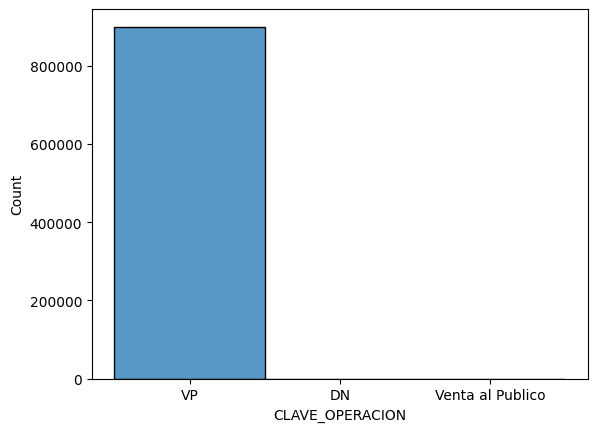

In [11]:
def_plot_hist(df_alhajas,'CLAVE_OPERACION',900000)

In [12]:
df_alhajas['CLAVE_OPERACION'].value_counts()

CLAVE_OPERACION
VP                  994916
DN                     431
Venta al Publico         8
Name: count, dtype: int64

<Axes: xlabel='OPERACION', ylabel='Count'>

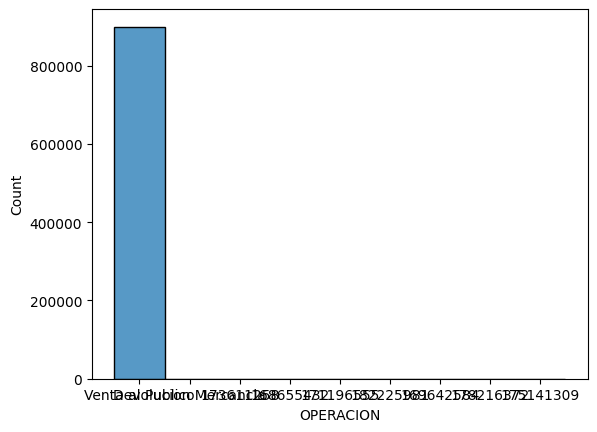

In [13]:
def_plot_hist(df_alhajas,'OPERACION',900000)

In [14]:
df_alhajas['OPERACION'].value_counts()

OPERACION
Venta al Publico        994916
Devolucion Mercancia       431
173728794                    1
169642584                    1
168655432                    1
171196555                    1
182225981                    1
175141309                    1
173611258                    1
178216372                    1
Name: count, dtype: int64

Las columnas CLAVE_OPERACION y OPERACION presentan una cardinalidad muy baja, por lo que se deciden retirar del análisis

**Interpretaciones**

Revisando a detalle los datos, identificamos que hay columnas que no contienen información, es redundante o no aporta valor agregado al análisis de acuerdo con el negocio, estas son las siguientes: PARTIDA, FACTOR_HECHURA, AVALUO_COMPLEMENTARIO, GASTOSOPERACION, IVAINTERESDEPOSITO, IVAINTERESALMONEDA, IVAGASTOSOPERACION, IVA_DESEXT, FECHA_EMPENO_OK, FECHA_HORA_MOV_OK, FECHA_COMERCIALIZACION_OK, CUSTODIA, COM_ALMACENAJE, IVACOM_ALMACENAJE, COMPASE_COMERCIALIZACION, IVACOM_PASECOM, IVACOM_EXHIBICION, INTERES_DEPRECUP, IVAINT_DEPRECUP, imp_minusvalia, imp_cancelacion_int, CLAVE_OPERACION, OPERACION y RANGO_DIAS_ALMONEDA (redundante con nuestra variable objetivo). Las cuales vamos a eliminar del dataset con la función drop de pandas

In [15]:
df_alhajas['AVALUO_COMPLEMENTARIO'].value_counts()

AVALUO_COMPLEMENTARIO
0           906621
47             200
94             184
0.47           163
23.5           126
             ...  
2116.88          1
8915.9           1
7419.89          1
17534.76         1
12635.01         1
Name: count, Length: 2999, dtype: int64

In [16]:
df_alhajas['PARTIDA'].value_counts()

PARTIDA
SIVA         8
179558181    5
178640811    4
179237461    4
183273846    4
            ..
180153339    1
180153411    1
180153528    1
180154055    1
175204537    1
Name: count, Length: 984463, dtype: int64

In [17]:
df_alhajas['FACTOR_HECHURA'].value_counts()

FACTOR_HECHURA
Buen Estado Sin Personalizar / Sin Abollar    359023
Abollado Ligero / Funcional                   295652
Rotas y Pedaceria                             111942
Personalizado                                  83287
Factor 1                                       50635
Monedas sin Oro                                21638
Monedas con Oro                                 9068
Marcas Comerciales                              5703
Marca                                           2555
Alta JoyerÃ­a / Excepcional                     1391
DiseÃ±o y Estado                                 205
RJ-Fundir                                         63
RJ-Marca                                          13
F3                                                 4
F4                                                 4
Alta JoyerÃ­a                                      1
Piezas Nuevas                                      1
Name: count, dtype: int64

In [18]:
df_alhajas['INTERESALMONEDA'].value_counts()

INTERESALMONEDA
0            306480
0.0047          466
0.0094          189
24.0452         152
17.1738         152
              ...  
672.3726          1
118.2661          1
427.7658          1
1504.3243         1
149.5916          1
Name: count, Length: 92420, dtype: int64

Revisando la variable INTERESALMONEDA, vamos a aplicar un método de discretización, para determinas si esta estrategia puede llegar a mejorar el rendimiento del modelo mediante la agrupación de atributos similares

In [19]:
df_alhajas['INTERESALMONEDA'] = pd.to_numeric(df_alhajas['INTERESALMONEDA'],errors='coerce').fillna(0)
df_alhajas['INTERESALMONEDA_BINS']= pd.cut(df_alhajas['INTERESALMONEDA'],bins=3)

C:\Users\HP\AppData\Local\Temp\ipykernel_13496\56771670.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_alhajas['INTERESALMONEDA'] = pd.to_numeric(df_alhajas['INTERESALMONEDA'],errors='coerce').fillna(0)
C:\Users\HP\AppData\Local\Temp\ipykernel_13496\56771670.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_alhajas['INTERESALMONEDA_BINS']= pd.cut(df_alhajas['INTERESALMONEDA'],bins=3)


In [20]:
df_alhajas['INTERESALMONEDA_BINS'].value_counts()

INTERESALMONEDA_BINS
(-24.052, 8017.476]       995317
(8017.476, 16034.952]         34
(16034.952, 24052.429]         4
Name: count, dtype: int64

<Axes: xlabel='INTERESALMONEDA_BINS', ylabel='count'>

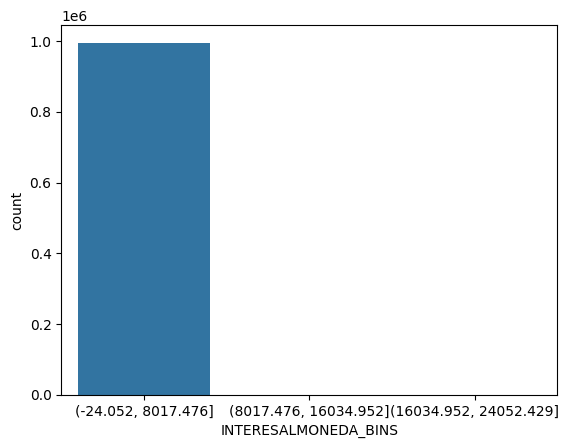

In [21]:
sns.countplot(x='INTERESALMONEDA_BINS',data=df_alhajas)

Ahora vamos a revisar la columna correspondiente a INTERES

In [22]:
df_alhajas['INTERES'].value_counts()

INTERES
0            147965
9.4             571
18.8            570
12.69           537
15.98           531
              ...  
1873.3119         1
1013.6584         1
9081.8523         1
8110.9874         1
851.4943          1
Name: count, Length: 135541, dtype: int64

In [23]:
df_alhajas['INTERES'] = pd.to_numeric(df_alhajas['INTERES'],errors='coerce').fillna(0)
df_alhajas['INTERES_BINS']= pd.cut(df_alhajas['INTERES'],bins=3)

C:\Users\HP\AppData\Local\Temp\ipykernel_13496\1244225756.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_alhajas['INTERES'] = pd.to_numeric(df_alhajas['INTERES'],errors='coerce').fillna(0)
C:\Users\HP\AppData\Local\Temp\ipykernel_13496\1244225756.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_alhajas['INTERES_BINS']= pd.cut(df_alhajas['INTERES'],bins=3)


In [24]:
df_alhajas['INTERES_BINS'].value_counts()

INTERES_BINS
(-101.397, 33799.163]     995347
(33799.163, 67598.327]         6
(67598.327, 101397.49]         2
Name: count, dtype: int64

<Axes: xlabel='INTERES_BINS', ylabel='count'>

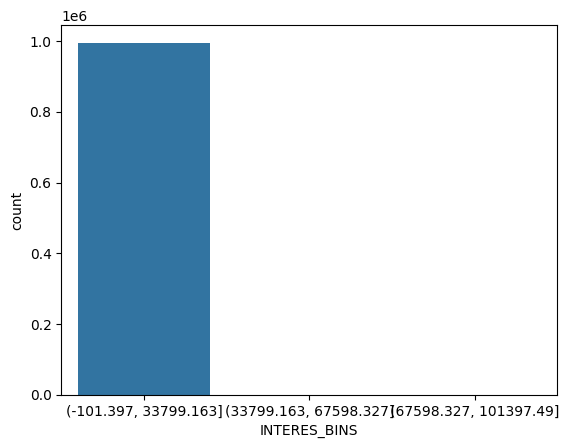

In [25]:
sns.countplot(x='INTERES_BINS',data=df_alhajas)

In [26]:
df_alhajas.drop(['AVALUO_COMPLEMENTARIO', 'PARTIDA','FACTOR_HECHURA','GASTOSOPERACION','DEMASIA','INTERESALMONEDA','INTERESALMONEDA_BINS','INTERES_BINS', 'IVAINTERESDEPOSITO', 'IVAINTERESALMONEDA', 'IVAGASTOSOPERACION', 'IVA_DESEXT',
              'FECHA_EMPENO_OK', 'FECHA_HORA_MOV_OK', 'FECHA_COMERCIALIZACION_OK', 'CUSTODIA', 'COM_ALMACENAJE','COM_EXHIBICION','FECHA_MAX_DEP_RECUP','num_particion',
              'IVACOM_ALMACENAJE', 'COMPASE_COMERCIALIZACION', 'IVACOM_PASECOM', 'IVACOM_EXHIBICION',
              'INTERES_DEPRECUP', 'IVAINT_DEPRECUP', 'imp_minusvalia', 'imp_cancelacion_int','CLAVE_OPERACION','OPERACION','RANGO_DIAS_ALMONEDA'], axis=1,inplace=True)


C:\Users\HP\AppData\Local\Temp\ipykernel_13496\3618705981.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_alhajas.drop(['AVALUO_COMPLEMENTARIO', 'PARTIDA','FACTOR_HECHURA','GASTOSOPERACION','DEMASIA','INTERESALMONEDA','INTERESALMONEDA_BINS','INTERES_BINS', 'IVAINTERESDEPOSITO', 'IVAINTERESALMONEDA', 'IVAGASTOSOPERACION', 'IVA_DESEXT',


In [27]:
df_alhajas.head(5)

,SUCURSAL,ESTADO_SUCURSAL,ORIGEN,DESCRIPCION_PARTIDA,GRAMAJE,KILATAJE,FACTOR,VALOR_MONTE,VALOR_MONTE_ACTUALIZADO,AVALUO_COMERCIAL,...,IMPORTE_VENTA,PRODUCTO,TASA_OFERTA,CANAL,DIAS_ALMONEDA,PRECIO_VENTA_FINAL_SID,TIPO_PRENDA,FCH_CARGA,SALDO_INSOLUTO,FECHA_CARGA
0,1005,CIUDAD DE MÃXICO,SIVA,176231504-1 ANILLO TIPO:DAMA DISEÃO:CABUJON D...,4,14,F3,0,NaN,NaN,...,1692,CL,3.5,Aprovechamiento Institucion,31,1309.42,anillo,03/05/2024,1309.42,2024-05-03T05:01:25.637Z
1,1005,CIUDAD DE MÃXICO,MIDAS,174275433-1 ANILLO ORO AMARILLO 14K PESO 1.60 ...,NaN,NaN,NaN,0,NaN,NaN,...,1221.53,CL,3.5,Aprovechamiento Institucion,31,741.19,anillo,03/05/2024,741.19,2024-05-03T05:01:25.637Z
2,1005,CIUDAD DE MÃXICO,MIDAS,173896016-1 MEDIA CHURUMBELA ORO AMARILLO 14K...,NaN,NaN,NaN,0,NaN,NaN,...,2115,CL,3.5,Aprovechamiento Institucion,31,1601.76,churumbela,03/05/2024,1601.76,2024-05-03T05:01:25.637Z
3,16,AGUASCALIENTES,SIVA,1 COLLAR TIPO:ROSARIO DISEÃO:ESFERAS LISAS D...,23.9,10,F4,0,NaN,0,...,7149.64,CL,4.85,Anticipado Ventanilla,29,0.47,collar,03/05/2024,0.47,2024-05-03T05:01:25.637Z
4,278,CIUDAD DE MÃXICO,SIVA,1 ACCESORIOS TIPO:LLAVERO DISEÃO:GRABADO DE O...,12.4,8,F2,0,NaN,0,...,1645,CL,4.85,Anticipado Ventanilla,21,0.47,otros,03/05/2024,0.47,2024-05-03T05:01:25.637Z


In [28]:
print('Número de filas:', df_alhajas.shape[0])                                             #Imprimir número de columnas y número de filas del dataframe posterior a esta primer limpieza
print('Número de columnas:', df_alhajas.shape[1])

Número de filas: 995355
Número de columnas: 35


In [29]:
print('Número de filas:', df_alhajas.shape[0])                                            #Imprimir número de columnas y número de filas del dataframe posterior a esta primer limpieza
print('Número de columnas:', df_alhajas.shape[1])

Número de filas: 995355
Número de columnas: 35


#**Valores Faltantes**

In [30]:
df_alhajas.isnull().sum()*100/len(df)

SUCURSAL                     0.000095
ESTADO_SUCURSAL              0.000000
ORIGEN                       0.000000
DESCRIPCION_PARTIDA          0.007439
GRAMAJE                      5.166059
KILATAJE                    12.309086
FACTOR                       5.166059
VALOR_MONTE                  0.000000
VALOR_MONTE_ACTUALIZADO     14.245333
AVALUO_COMERCIAL             5.864530
PRESTAMO                     0.000000
PRECIO_VENTA_INICIAL         0.000000
PRECIO_VENTA_FINAL           0.000000
FECHA_EMPENO                 0.000000
FECHA_COMERCIALIZACION       0.000000
VALOR_ANCLA_ORO             14.245333
RAMO                         0.000000
SUBRAMO                      0.000000
REFRENDOS_REALIZADOS         0.000000
INCREMENTO                  13.191617
DESPLAZAMIENTO_COMERCIAL    13.191617
VALUADOR                     2.670291
FECHA_HORA_MOV               0.000095
INTERES                      0.000000
DES_EXT                      3.527454
IMPORTE_VENTA                0.000000
PRODUCTO    

In [31]:
                                                                                  #Imprimir número de columnas y número de filas del dataframe posterior a esta primer limpieza
print('Número de filas:', df_alhajas.shape[0])
print('Número de columnas:', df_alhajas.shape[1])

Número de filas: 995355
Número de columnas: 35


In [32]:
df_alhajas.isnull().sum()*100/len(df)

SUCURSAL                     0.000095
ESTADO_SUCURSAL              0.000000
ORIGEN                       0.000000
DESCRIPCION_PARTIDA          0.007439
GRAMAJE                      5.166059
KILATAJE                    12.309086
FACTOR                       5.166059
VALOR_MONTE                  0.000000
VALOR_MONTE_ACTUALIZADO     14.245333
AVALUO_COMERCIAL             5.864530
PRESTAMO                     0.000000
PRECIO_VENTA_INICIAL         0.000000
PRECIO_VENTA_FINAL           0.000000
FECHA_EMPENO                 0.000000
FECHA_COMERCIALIZACION       0.000000
VALOR_ANCLA_ORO             14.245333
RAMO                         0.000000
SUBRAMO                      0.000000
REFRENDOS_REALIZADOS         0.000000
INCREMENTO                  13.191617
DESPLAZAMIENTO_COMERCIAL    13.191617
VALUADOR                     2.670291
FECHA_HORA_MOV               0.000095
INTERES                      0.000000
DES_EXT                      3.527454
IMPORTE_VENTA                0.000000
PRODUCTO    

Vamos a revisar ahora las columnas con el porcentaje de valores faltantes

In [33]:
per_miss_col = df_alhajas.isna().mean() * 100
missing = pd.DataFrame(per_miss_col)
missing.columns = ['Percentage of missing values (%)']
missing

,Percentage of missing values (%)
SUCURSAL,0.000100
ESTADO_SUCURSAL,0.000000
ORIGEN,0.000000
DESCRIPCION_PARTIDA,0.007836
GRAMAJE,5.442279
KILATAJE,12.967233
FACTOR,5.442279
VALOR_MONTE,0.000000
VALOR_MONTE_ACTUALIZADO,15.007008
AVALUO_COMERCIAL,6.178097


Valores Atípicos - Categóricas

El análisis se comenzará con las varibales categóricas de acuerdo al negocio y posteriormente a las variables numéricas, en donde se aplicará un análisis de outliers, para eliminarlos y obtener distribuciones más normales

1. SUCURSAL

In [34]:
df_alhajas['SUCURSAL'].value_counts()/len(df)*100

SUCURSAL
1001             10.276137
0                 3.843311
28                1.290895
1005              1.066114
12                0.820828
                   ...    
DO DE MÃXICO     0.000095
 DE MÃXICO       0.000095
D DE MÃXICO      0.000095
RACRUZ            0.000095
CO                0.000095
Name: count, Length: 310, dtype: float64

In [35]:
#Función para convertir valores numéricos representados como texto a su tipo correspondiente
def convert_to_numeric(value):
  try:
    if '.' in value:
      return float(value)
    else:
      return int(value)
  except (ValueError, TypeError):
      return value

In [36]:
df_alhajas['SUCURSAL'] = df_alhajas['SUCURSAL'].apply(lambda x: convert_to_numeric(x) if isinstance(x, str) else x)

C:\Users\HP\AppData\Local\Temp\ipykernel_13496\387515428.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_alhajas['SUCURSAL'] = df_alhajas['SUCURSAL'].apply(lambda x: convert_to_numeric(x) if isinstance(x, str) else x)


In [37]:
df_alhajas['SUCURSAL'] = df_alhajas['SUCURSAL'].apply(lambda x: x if isinstance(x, (int, float)) else 'Otros')

C:\Users\HP\AppData\Local\Temp\ipykernel_13496\1446523568.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_alhajas['SUCURSAL'] = df_alhajas['SUCURSAL'].apply(lambda x: x if isinstance(x, (int, float)) else 'Otros')


In [38]:
df_alhajas['SUCURSAL'].value_counts()

SUCURSAL
1001     107753
0         40300
28        13536
1005      11179
12         8607
          ...  
216        1079
159        1011
226         945
325         703
Otros         7
Name: count, Length: 305, dtype: int64

In [39]:
# Función para verificar si un valor es un entero, incluyendo flotantes sin parte decimal
def is_integer(value):
  return isinstance(value, int) or (isinstance(value, float) and value.is_integer())


In [40]:
# Filtrar el DataFrame para conservar únicamente los valores enteros
df_filtered_after_Sucursal = df_alhajas[df_alhajas['SUCURSAL'].apply(is_integer)]


In [41]:
df_alhajas = df_filtered_after_Sucursal

In [42]:
df_alhajas['SUCURSAL'].value_counts()/len(df)*100

SUCURSAL
1001    10.276137
0        3.843311
28       1.290895
1005     1.066114
12       0.820828
          ...    
96       0.105953
216      0.102902
159      0.096417
226      0.090122
325      0.067043
Name: count, Length: 304, dtype: float64

2. ESTADO_SUCURSAL

In [43]:
df_alhajas['ESTADO_SUCURSAL'].unique()

array(['CIUDAD DE MÃ\x89XICO', 'AGUASCALIENTES', 'CHIHUAHUA',
       'BAJA CALIFORNIA SUR', 'GUANAJUATO', 'QUINTANA ROO', 'MORELOS',
       'PUEBLA', 'GUERRERO', 'CHIAPAS', 'VERACRUZ', 'OAXACA',
       'MICHOACÃ\x81N', 'ESTADO DE MÃ\x89XICO', 'SINALOA', 'JALISCO',
       'COLIMA', 'QUERÃ\x89TARO', 'NUEVO LEÃ\x93N', 'SAN LUIS POTOSÃ\x8d',
       'COAHUILA', 'YUCATÃ\x81N', 'NAYARIT', 'CAMPECHE', 'DURANGO',
       'TAMAULIPAS', 'TABASCO', 'SONORA', 'BAJA CALIFORNIA NORTE',
       'HIDALGO', 'TLAXCALA', 'MORELIA', 'ZACATECAS'], dtype=object)

In [44]:
estados_validos = ['CIUDAD DE MÃ\x89XICO', 'AGUASCALIENTES', 'CHIHUAHUA',
       'BAJA CALIFORNIA SUR', 'GUANAJUATO', 'QUINTANA ROO', 'MORELOS',
       'PUEBLA', 'GUERRERO', 'CHIAPAS', 'VERACRUZ', 'OAXACA',
       'MICHOACÃ\x81N', 'ESTADO DE MÃ\x89XICO', 'SINALOA', 'JALISCO',
       'NUEVO LEÃ\x93N', 'TAMAULIPAS', 'COLIMA', 'QUERÃ\x89TARO',
       'SAN LUIS POTOSÃ\x8d', 'COAHUILA', 'YUCATÃ\x81N', 'NAYARIT',
       'CAMPECHE', 'DURANGO', 'SONORA', 'TABASCO',
       'BAJA CALIFORNIA NORTE', 'HIDALGO', 'TLAXCALA', 'MORELIA',
       'ZACATECAS']

In [45]:
df_filtrado_after_estado = df_alhajas[df_alhajas['ESTADO_SUCURSAL'].isin(estados_validos)]

In [46]:
df_alhajas = df_filtrado_after_estado


3. ORIGEN

In [47]:
df_alhajas['ORIGEN'].value_counts()/len(df)*100

ORIGEN
SIVA     89.749899
MIDAS     5.173879
Name: count, dtype: float64

Viendo los datos y cardinalidad de la variable, no se requiere hacer mayor cambio

4. DESCRIPCIÓN PARTIDA

In [48]:
df_alhajas['DESCRIPCION_PARTIDA'].value_counts()/len(df)*100

DESCRIPCION_PARTIDA
BROQUELES  0.1GR  14K                                                                                             0.025082
BROQUELES    0.1GR  14K                                                                                           0.023460
1 ANILLO TIPO:DAMA DISEÃO:CON SINTETICO DE ORO BAJO Y PESO DE 1.00 GRAMOS                                        0.018978
1 PAR DE ARETES TIPO:ARRACADAS DISEÃO:FACETADO DE ORO BAJO Y PESO DE 1.00 GRAMOS                                 0.018597
1 PAR DE ARETES TIPO:ARRACADAS DISEÃO:FACETADO DE ORO BAJO Y PESO DE 1.10 GRAMOS                                 0.015450
                                                                                                                    ...   
1 PULSERA TIPO:COMBINADA DISEÃO:ESLABON EQUIS ROTO SUELTO DE ORO MEDIO Y PESO DE 11.60 GRAMOS                    0.000095
1 PAR DE ARETES TIPO:ESMALTE DISEÃO:GRABADO DE ORO BAJO Y PESO DE 4.30 GRAMOS ABOLLADO                           0.000

In [49]:
df_alhajas['DESCRIPCION_PARTIDA'].unique()

array(['176231504-1 ANILLO TIPO:DAMA DISEÃ\x91O:CABUJON DE ORO MEDIO Y PESO DE 4.00 GRAMOS',
       '174275433-1 ANILLO ORO AMARILLO 14K PESO 1.60 GRAMOS CON 1 DIAMANTE(S) CORTE BRILLANTE REDONDO I-J VS PESO TOTAL APROXIMADO 0.03 QTS Y 16 DIAMANTE(S) CORTE BRILLANTE REDONDO I-J SI1 PESO TOTAL APROXIMADO 0.16 QTS. LA CLASIFICACIÃ\x93N DE QUILATAJE- COLOR Y CL',
       '173896016-1 MEDIA CHURUMBELA  ORO AMARILLO 14K PESO 2.30 GRAMOS CON 5 DIAMANTE(S) CORTE BRILLANTE REDONDO I-J VS PESO TOTAL APROXIMADO 0.30 QTS. CUADROS ETIQUETA TTLES.2.5. LA CLASIFICACIÃ\x93N DE QUILATAJE- COLOR Y CLARIDAD DEL DIAMANTE SON VALORES APROXIMAD',
       ...,
       '1 ANILLO TIPO:DAMA DISEÃ\x91O:CON SINTETICO DE ORO MEDIO Y PESO DE 2.40 GRAMOS GRS T 2.7',
       '1 PAR BROQUELES  ORO AMARILLO 14K PESO 6.00 GRAMOS CON 40 DIAMANTE(S) CORTE BRILLANTE REDONDO G-H I3 PESO TOTAL APROXIMADO 0.80 QTS. CON CONTRAS. LA CLASIFICACIÃ\x93N DE QUILATAJE- COLOR Y CLARIDAD DEL DIAMANTE SON VALORES APROXIMADOS.',
       'AN

Esta columna es la descripción de cada artículo a detalle, por lo que no es necesario para el análisis, ya que hay otras variables que describen mejor el artículo y más eficientemente como es RAMO, SUBRAMO y TIPO_PRENDA. Por esta razón eliminamos esta variable del análisis

In [50]:
df_alhajas.drop(['DESCRIPCION_PARTIDA'], axis=1,inplace=True)

In [51]:
df_alhajas.shape

(995347, 34)

7. RAMO

In [52]:
df_alhajas['RAMO'].value_counts()/len(df_alhajas)*100

RAMO
Alhajas    100.0
Name: count, dtype: float64

Viendo los datos y cardinalidad de la variable, es redundante y no agrega valor, por lo que se decide retirar del análisis.

In [53]:
df_alhajas.drop(['RAMO'], axis=1,inplace=True)

8. SUBRAMO

In [54]:
df_alhajas['SUBRAMO'].value_counts()/len(df_alhajas)*100

SUBRAMO
Alhajas      88.914821
Otros         5.292526
Monedas       3.095704
Diamantes     2.629334
PedrerÃ­a     0.059678
Relojes       0.007937
Name: count, dtype: float64

Viendo los datos y cardinalidad de la variable, no se requiere algo adicional para el análisis

9. VALUADOR

In [55]:
df_alhajas['VALUADOR'].unique()

array(['0', '1200444', '2010538', '1984068', '1200414', nan, '1400108',
       '1400081', '2001098', '2010394', '1995116', '1987023', '2004106',
       '1987071', '1984090', '2002011', '1987065', '1989061', '1982014',
       '2010564', '2000165', '2010544', '2001127', '1973044', '2011080',
       '1983063', '2001130', '1989079', '1996212', '2002149', '2002443',
       '2000050', '1984037', '1996014', '1990025', '2006118', '2002120',
       '1979017', '2010184', '1972026', '2010596', '1986028', '2005008',
       '2002189', '2001100', '2006090', '2002146', '1996142', '2002017',
       '2002155', '1500019', '1988060', '2002080', '2002179', '1989089',
       '2002097', '1984023', '1989127', '2010176', '1200146', '1300219',
       '2002440', '2001356', '2002022', '1985130', '2011094', '2010460',
       '1988070', '1200461', '2010404', '2005064', '2001186', '2010007',
       '2003029', '2002113', '2005035', '2010287', '2004071', '1996118',
       '1996175', '1989039', '1989009', '2004210', '

Viendo los datos y cardinalidad de la variable, no se requiere algo adicional para el análisis

10. PRODUCTO

In [56]:
df_alhajas['PRODUCTO'].unique()

array(['CL', 'PL'], dtype=object)

Viendo los datos y cardinalidad de la variable, no se requiere algo adicional para el análisis

11. CANAL

In [57]:
df_alhajas['CANAL'].value_counts()/len(df_alhajas)*100

CANAL
Cumplido                       95.994663
IMECOS                          2.854080
Aprovechamiento Institucion     0.860805
Anticipado Ventanilla           0.285830
Pase Anticipado                 0.000301
Name: count, dtype: float64

Viendo los datos y cardinalidad de la variable, no se requiere algo adicional para el análisis

12. TIPO_PRENDA

In [58]:
df_alhajas['TIPO_PRENDA'].unique()

array(['anillo', 'churumbela', 'collar', 'otros', 'pendiente', 'esclava',
       'arracada', 'pulsera', 'gargantilla', 'rosario', 'cruz', 'broquel',
       'arete', 'argolla', nan, 'moneda', 'mancuernilla', 'brazalete',
       'colgante', 'ahogador', 'reloj', 'violador', 'anillo con diamante',
       'lote', 'telÃ©fono', 'pluma', 'pantalla', 'celular'], dtype=object)

Viendo los datos y cardinalidad de la variable, no se requiere algo adicional para el análisis

In [59]:
df_alhajas = df_alhajas.dropna(thresh=10)                                                          # Mantiene filas con al menos 10 valores no nulos


#**Asignación de tipo de dato a cada variable**

Un punto importante a destacar es que el tipo de dato de cada columna, está por default como "objeto", lo que haremos a continuación será asignar el tipo de datos que está de acuerdo con la naturaleza correcta de los datos y de acuerdo con el negocio

In [60]:
                                                                                   #Diccionario con columnas y tipo de dato correcto
dicc = {
    'SUCURSAL': 'str',
    'ESTADO_SUCURSAL': 'str',
    'ORIGEN': 'str',
    'GRAMAJE':'float',
    'KILATAJE':'str',
    'FACTOR': 'str',
    'VALOR_MONTE': 'float',
    'VALOR_MONTE_ACTUALIZADO':'float',
    'AVALUO_COMERCIAL':'float',
    'PRESTAMO': 'float',
    'PRECIO_VENTA_INICIAL': 'float',
    'PRECIO_VENTA_FINAL': 'float',
    'FECHA_EMPENO': 'datetime',
    'FECHA_COMERCIALIZACION': 'datetime',
    'VALOR_ANCLA_ORO':'float',
    'SUBRAMO': 'str',
    'REFRENDOS_REALIZADOS': 'float',
    'INCREMENTO': 'str',
    'DESPLAZAMIENTO_COMERCIAL': 'str',
    'VALUADOR': 'str',
    'FECHA_HORA_MOV': 'datetime',
    'INTERES':'float',
    'DES_EXT':'float',
    'IMPORTE_VENTA':'float',
    'PRODUCTO':'str',
    'TASA_OFERTA':'float',
    'CANAL':'str',
    'DIAS_ALMONEDA': 'float',
    'PRECIO_VENTA_FINAL_SID': 'float',
    'TIPO_PRENDA': 'str',
    'FCH_CARGA': 'datetime',
    'SALDO_INSOLUTO': 'float',
    'FECHA_CARGA': 'datetime'
}

In [61]:
                                                                                       #Convertir los tipos de datos
for col, tipo in dicc.items():
  if tipo in ['int', 'float']:                                                         # Manejar valores numericos
    try:
      df_alhajas[col] = pd.to_numeric(df_alhajas[col], errors='coerce')                                # Convertir a tipo numerico, invalid values become NaN
    except ValueError:
      print(f"Could not convert column '{col}' to {tipo}. Skipping...")


  elif tipo == 'datetime':
    try:                                                                               # Manejar fechas
      df_alhajas[col] = pd.to_datetime(df_alhajas[col], errors='coerce')                               # Convert to datetime, invalid values become NaT
    except ValueError:
      print(f"Could not convert column '{col}' to {tipo}. Skipping...")
  else:                                                                                # Manejar strings
    df_alhajas[col] = df_alhajas[col].astype(tipo)

In [62]:
df_alhajas.info()

<class 'pandas.core.frame.DataFrame'>
Index: 995347 entries, 0 to 1048574
Data columns (total 33 columns):
 #   Column                    Non-Null Count   Dtype              
---  ------                    --------------   -----              
 0   SUCURSAL                  995347 non-null  object             
 1   ESTADO_SUCURSAL           995347 non-null  object             
 2   ORIGEN                    995347 non-null  object             
 3   GRAMAJE                   941177 non-null  float64            
 4   KILATAJE                  995347 non-null  object             
 5   FACTOR                    995347 non-null  object             
 6   VALOR_MONTE               995347 non-null  float64            
 7   VALOR_MONTE_ACTUALIZADO   845974 non-null  float64            
 8   AVALUO_COMERCIAL          933853 non-null  float64            
 9   PRESTAMO                  995347 non-null  float64            
 10  PRECIO_VENTA_INICIAL      995347 non-null  float64            
 11  PREC

Vamos a revisar los valores únicos por columna

In [63]:
df_alhajas['DIAS_ALMONEDA'].dtype

dtype('int64')

In [64]:
df_alhajas[df_alhajas['DIAS_ALMONEDA']== df_alhajas['DIAS_ALMONEDA'].max()]


,SUCURSAL,ESTADO_SUCURSAL,ORIGEN,GRAMAJE,KILATAJE,FACTOR,VALOR_MONTE,VALOR_MONTE_ACTUALIZADO,AVALUO_COMERCIAL,PRESTAMO,...,IMPORTE_VENTA,PRODUCTO,TASA_OFERTA,CANAL,DIAS_ALMONEDA,PRECIO_VENTA_FINAL_SID,TIPO_PRENDA,FCH_CARGA,SALDO_INSOLUTO,FECHA_CARGA
971404,4,CIUDAD DE MÃXICO,MIDAS,NaN,nan,nan,94.0,NaN,NaN,47.0,...,2350.0,CL,3.0,Pase Anticipado,3819,461.07,otros,2024-10-05,47.0,2024-05-13 09:10:50.693000+00:00
971405,4,CIUDAD DE MÃXICO,MIDAS,NaN,nan,nan,94.0,NaN,NaN,47.0,...,4700.0,CL,3.0,Pase Anticipado,3819,696.07,otros,2024-10-05,47.0,2024-05-13 09:10:50.693000+00:00
971406,4,CIUDAD DE MÃXICO,MIDAS,NaN,nan,nan,94.0,NaN,NaN,47.0,...,7520.0,CL,3.0,Pase Anticipado,3819,978.07,otros,2024-10-05,47.0,2024-05-13 09:10:50.693000+00:00


In [65]:
df_alhajas.nunique()

SUCURSAL                       304
ESTADO_SUCURSAL                 33
ORIGEN                           2
GRAMAJE                       4315
KILATAJE                        10
FACTOR                          13
VALOR_MONTE                  37300
VALOR_MONTE_ACTUALIZADO      37393
AVALUO_COMERCIAL             41581
PRESTAMO                     24065
PRECIO_VENTA_INICIAL         38524
PRECIO_VENTA_FINAL           40959
FECHA_EMPENO                   565
FECHA_COMERCIALIZACION         462
VALOR_ANCLA_ORO               1406
SUBRAMO                          6
REFRENDOS_REALIZADOS             8
INCREMENTO                      25
DESPLAZAMIENTO_COMERCIAL         8
VALUADOR                       795
FECHA_HORA_MOV                  98
INTERES                     135541
DES_EXT                      25875
IMPORTE_VENTA                40957
PRODUCTO                         2
TASA_OFERTA                     68
CANAL                            6
DIAS_ALMONEDA                 1487
PRECIO_VENTA_FINAL_S

#Valores Atípicos - Numéricas

A continuación vamos a hacer un análisis de cada variable para identificar y eliminar valores atípicos de las variables. Para esto haremos una análisis a detalle de cada variable

Para visualizar si hay valores atípicos, vamos a generar gráficos de box plot para las variables numéricas

1. VALOR_MONTE

In [66]:
'''This function is to plot a boxplot of variables using seaborn and retrieving data from a defined sample'''
def def_plot_hist(df,column,num_samples):
    sample = df.sample(num_samples)
    return sns.boxplot(sample[column])

<Axes: ylabel='VALOR_MONTE'>

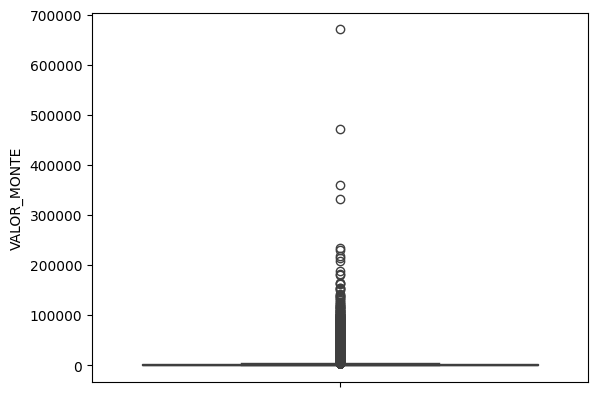

In [ ]:
def_plot_hist(df_alhajas,'VALOR_MONTE',900000)

1. VALOR_MONTE

In [68]:
percentile_25 = df_alhajas["VALOR_MONTE"].quantile(0.25)
percentile_75 = df_alhajas["VALOR_MONTE"].quantile(0.75)
iqr = percentile_75 - percentile_25
upper_limit = percentile_75 + 1.5 * iqr
lower_limit = percentile_25 - 1.5 * iqr
IQR_outliers = df_alhajas[(df_alhajas["VALOR_MONTE"] < lower_limit) | (df_alhajas["VALOR_MONTE"] > upper_limit)]
valormonte_outliers = IQR_outliers['VALOR_MONTE']

valormonte_outliers_df = pd.DataFrame(valormonte_outliers)
valormonte_outliers_df.columns = ['valormonte_outliers']
valormonte_outliers_df

,valormonte_outliers
8,6897.72
20,5878.76
63,5851.97
70,6313.51
83,19018.08
...,...
1048456,5407.82
1048489,8138.52
1048503,6890.20
1048515,15809.39


In [69]:
df_alhajas.drop(valormonte_outliers_df.index, inplace=True)

<Axes: ylabel='VALOR_MONTE'>

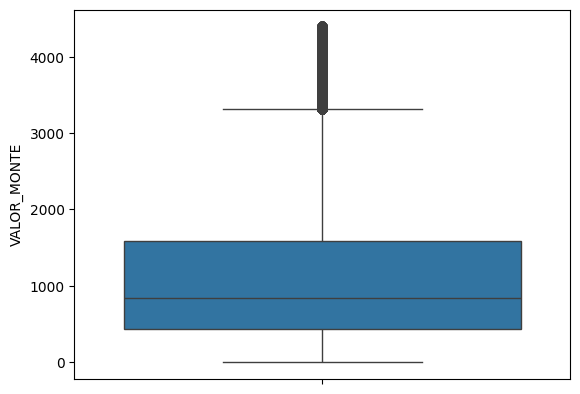

In [71]:
def_plot_hist(df_alhajas,'VALOR_MONTE',800000)

Analizando los gráficos vemos que el análisis mejoró mucho el nivel de valores atípicos de la variable en cuestión VALOR_MONTE.

2. GRAMAJE

<Axes: ylabel='GRAMAJE'>

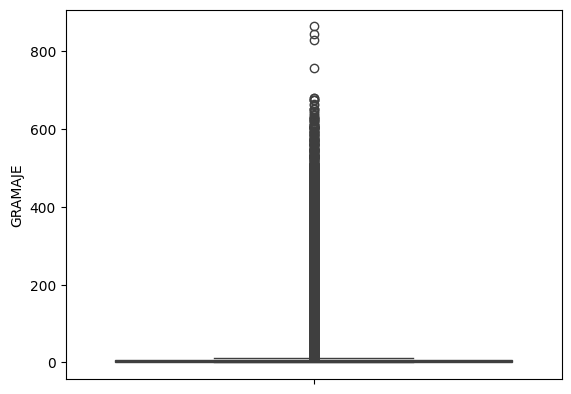

In [72]:
def_plot_hist(df_alhajas,'GRAMAJE',800000)

In [73]:
percentile_25 = df_alhajas["GRAMAJE"].quantile(0.25)
percentile_75 = df_alhajas["GRAMAJE"].quantile(0.75)
iqr = percentile_75 - percentile_25
upper_limit = percentile_75 + 1.5 * iqr
lower_limit = percentile_25 - 1.5 * iqr
IQR_outliers = df_alhajas[(df_alhajas["GRAMAJE"] < lower_limit) | (df_alhajas["GRAMAJE"] > upper_limit)]
gramaje_outliers = IQR_outliers['GRAMAJE']

gramaje_outliers_df = pd.DataFrame(gramaje_outliers)
gramaje_outliers_df.columns = ['gramaje_outliers']
gramaje_outliers_df

,gramaje_outliers
3,23.9
6,13.8
12,45.0
54,13.0
60,19.0
...,...
1048474,33.2
1048542,17.5
1048552,16.1
1048558,216.1


In [74]:
df_alhajas.drop(gramaje_outliers_df.index, inplace=True)

<Axes: ylabel='GRAMAJE'>

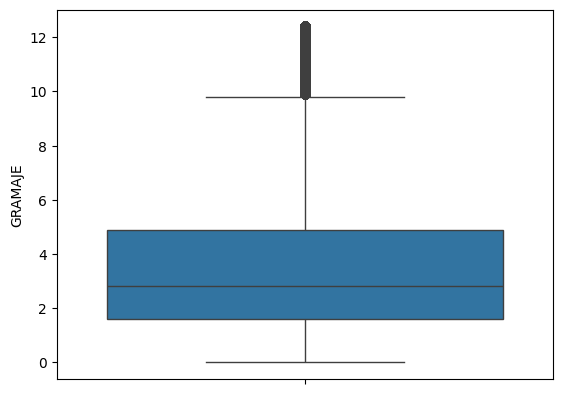

In [75]:
def_plot_hist(df_alhajas,'GRAMAJE',800000)

3. VALOR_MONTE / VALOR_MONTE_ACTUALIZADO / AVALUO_COMERCIAL / PRESTAMO / PRECIO_VENTA_INICIAL

<Axes: >

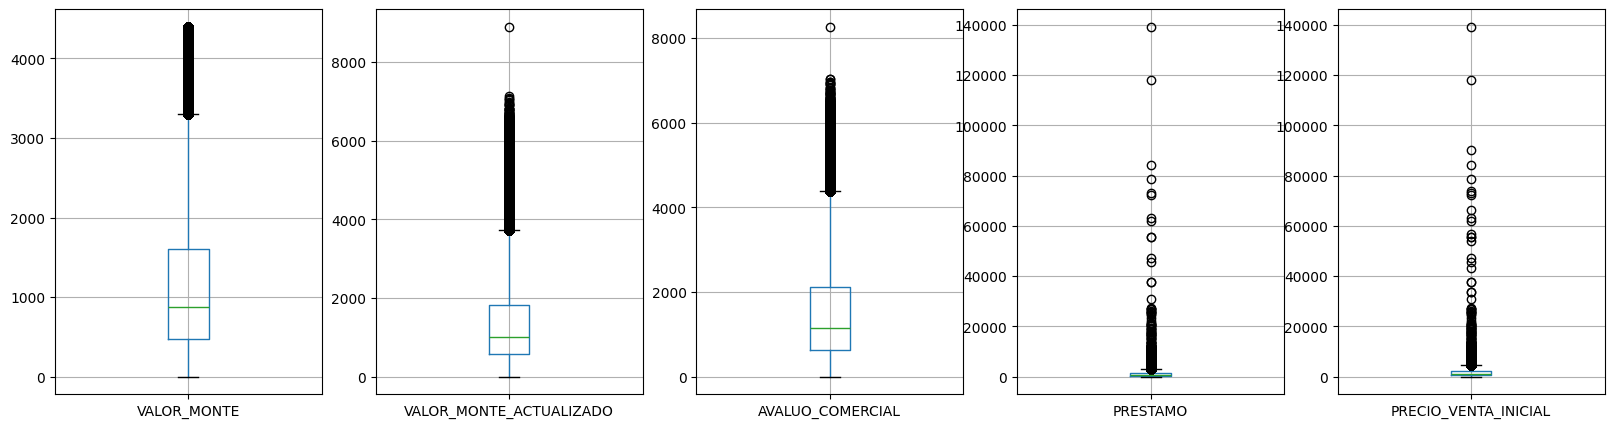

In [76]:
fig, axis = plt.subplots(1,5,figsize=(20,5))
df_alhajas.boxplot(column=['VALOR_MONTE'],ax=axis[0])
df_alhajas.boxplot(column=['VALOR_MONTE_ACTUALIZADO'],ax=axis[1])
df_alhajas.boxplot(column=['AVALUO_COMERCIAL'],ax=axis[2])
df_alhajas.boxplot(column=['PRESTAMO'],ax=axis[3])
df_alhajas.boxplot(column=['PRECIO_VENTA_INICIAL'],ax=axis[4])

Podemos observar que las variables VALOR_MONTE, VALOR_MONTE_ACTUALIZADO y AVALUO_COMERCIAL si están más definidos sus rangos intercuartílicos, por lo que decidimo no eliminar outliers de estas tres variables. 

3-4 PRESTAMO / PRECIO_VENTA_INICIAL

3. PRESTAMO

In [77]:
percentile_25 = df_alhajas["PRESTAMO"].quantile(0.25)
percentile_75 = df_alhajas["PRESTAMO"].quantile(0.75)
iqr = percentile_75 - percentile_25
upper_limit = percentile_75 + 1.5 * iqr
lower_limit = percentile_25 - 1.5 * iqr
IQR_outliers = df_alhajas[(df_alhajas["PRESTAMO"] < lower_limit) | (df_alhajas["PRESTAMO"] > upper_limit)]
prestamo_outliers = IQR_outliers['PRESTAMO']

prestamo_outliers_df = pd.DataFrame(prestamo_outliers)
prestamo_outliers_df.columns = ['prestamo_outliers']
prestamo_outliers_df

,prestamo_outliers
9,3138.1712
19,4138.3641
42,4360.8715
43,3196.2397
113,3478.0000
...,...
1048467,3435.7000
1048478,2932.8000
1048484,3266.5000
1048516,2942.2000


In [78]:
df_alhajas.drop(prestamo_outliers_df.index, inplace=True)

<Axes: ylabel='PRESTAMO'>

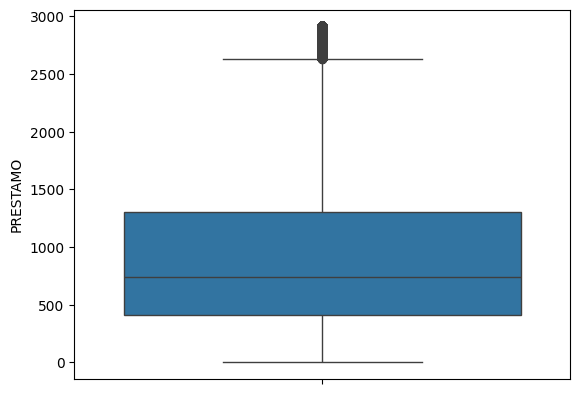

In [79]:
sns.boxplot(df_alhajas['PRESTAMO'])

4. PRECIO_VENTA_INICIAL

In [80]:
percentile_25 = df_alhajas["PRECIO_VENTA_INICIAL"].quantile(0.25)
percentile_75 = df_alhajas["PRECIO_VENTA_INICIAL"].quantile(0.75)
iqr = percentile_75 - percentile_25
upper_limit = percentile_75 + 1.5 * iqr
lower_limit = percentile_25 - 1.5 * iqr
IQR_outliers = df_alhajas[(df_alhajas["PRECIO_VENTA_INICIAL"] < lower_limit) | (df_alhajas["PRECIO_VENTA_INICIAL"] > upper_limit)]
precio_venta_inicial_outliers = IQR_outliers['PRECIO_VENTA_INICIAL']

precio_venta_inicial_outliers_df = pd.DataFrame(precio_venta_inicial_outliers)
precio_venta_inicial_outliers_df.columns = ['precio_venta_inicial_outliers']
precio_venta_inicial_outliers_df

,precio_venta_inicial_outliers
79,6158.88
97,4311.78
208,4308.49
276,4620.57
284,4851.81
...,...
1047968,4483.33
1048262,6330.43
1048358,4386.98
1048431,5538.48


In [81]:
df_alhajas.drop(precio_venta_inicial_outliers_df.index, inplace=True)

<Axes: ylabel='PRECIO_VENTA_INICIAL'>

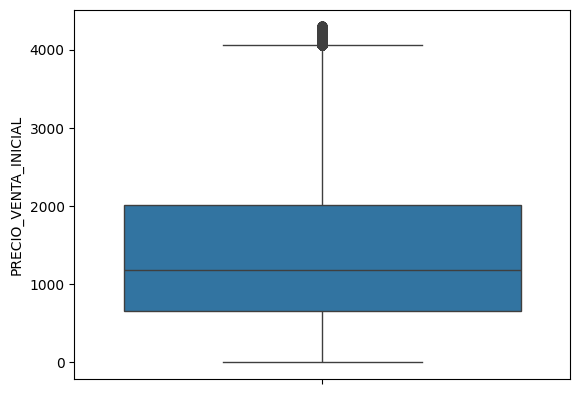

In [82]:
sns.boxplot(df_alhajas['PRECIO_VENTA_INICIAL'])

5-9. PRECIO_VENTA_FINAL / VALOR_ANCLA_ORO / REFRENDOS_REALIZADOS / INTERES / DES_EXT

<Axes: >

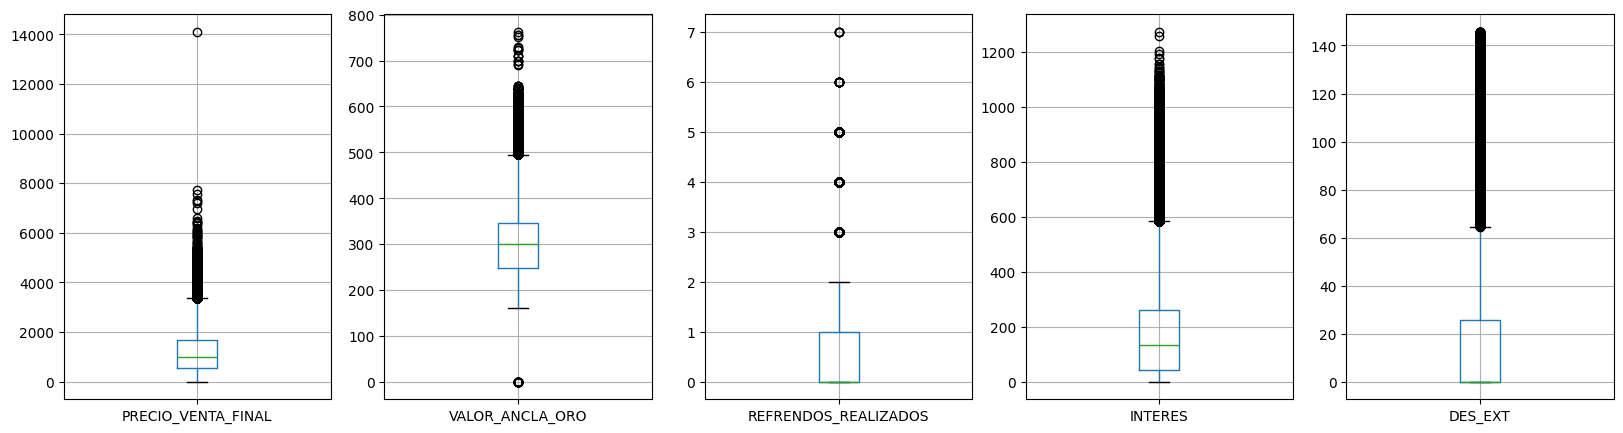

In [83]:
fig, axis = plt.subplots(1,5,figsize=(20,5))
df_alhajas.boxplot(column=['PRECIO_VENTA_FINAL'],ax=axis[0])
df_alhajas.boxplot(column=['VALOR_ANCLA_ORO'],ax=axis[1])
df_alhajas.boxplot(column=['REFRENDOS_REALIZADOS'],ax=axis[2])
df_alhajas.boxplot(column=['INTERES'],ax=axis[3])
df_alhajas.boxplot(column=['DES_EXT'],ax=axis[4])

Comentarios: revisando los rango intercuartílicos de las variables, podemos observar que el precio_venta_final si es necesario eliminar outliers, así como de la variable de INTERES y DES_EXT. Ya que el VALOR_ANCLA_ORO y REFRENDOS_REALIZADOS no es significativo el máximo y mínimo

5. PRECIO_VENTA_FINAL

In [84]:
percentile_25 = df_alhajas["PRECIO_VENTA_FINAL"].quantile(0.25)
percentile_75 = df_alhajas["PRECIO_VENTA_FINAL"].quantile(0.75)
iqr = percentile_75 - percentile_25
upper_limit = percentile_75 + 1.5 * iqr
lower_limit = percentile_25 - 1.5 * iqr
IQR_outliers = df_alhajas[(df_alhajas["PRECIO_VENTA_FINAL"] < lower_limit) | (df_alhajas["PRECIO_VENTA_FINAL"] > upper_limit)]
precio_venta_final_outliers = IQR_outliers['PRECIO_VENTA_FINAL']

precio_venta_final_outliers_df = pd.DataFrame(precio_venta_final_outliers)
precio_venta_final_outliers_df.columns = ['precio_venta_inicial_outliers']
precio_venta_final_outliers_df

,precio_venta_inicial_outliers
30,3469.07
1013,3437.58
1400,3421.60
2847,3631.22
3149,3442.75
...,...
1048375,3400.92
1048396,3376.95
1048567,3782.56
1048573,3433.82


In [85]:
df_alhajas.drop(precio_venta_final_outliers_df.index, inplace=True)

<Axes: ylabel='PRECIO_VENTA_FINAL'>

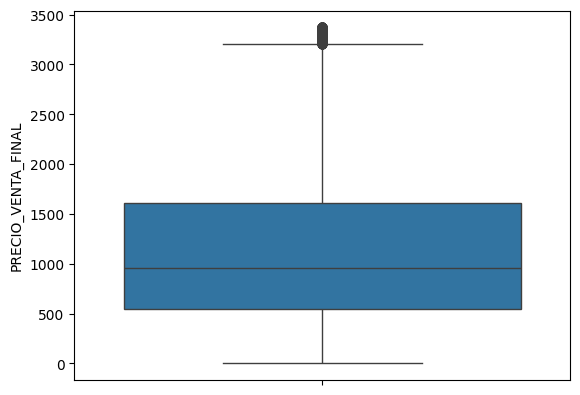

In [86]:
sns.boxplot(df_alhajas['PRECIO_VENTA_FINAL'])

6. INTERES

In [87]:
percentile_25 = df_alhajas["INTERES"].quantile(0.25)
percentile_75 = df_alhajas["INTERES"].quantile(0.75)
iqr = percentile_75 - percentile_25
upper_limit = percentile_75 + 1.5 * iqr
lower_limit = percentile_25 - 1.5 * iqr
IQR_outliers = df_alhajas[(df_alhajas["INTERES"] < lower_limit) | (df_alhajas["INTERES"] > upper_limit)]
interes_outliers = IQR_outliers['INTERES']

interes_outliers_df = pd.DataFrame(interes_outliers)
interes_outliers_df.columns = ['interes_outliers']
interes_outliers_df

,interes_outliers
248,568.7000
255,583.9938
462,583.7400
470,796.5278
499,708.2571
...,...
1048290,597.3089
1048305,598.5074
1048424,829.4184
1048434,601.0172


In [88]:
df_alhajas.drop(interes_outliers_df.index, inplace=True)

<Axes: ylabel='INTERES'>

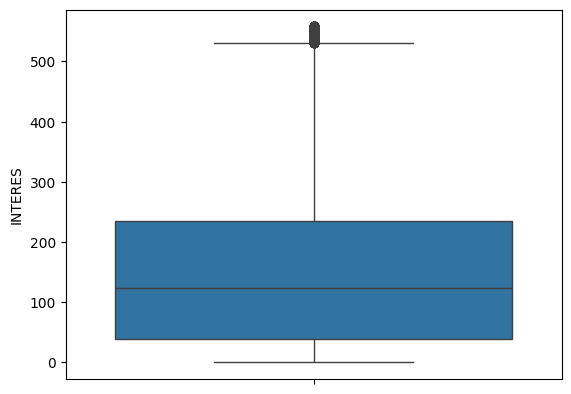

In [89]:
sns.boxplot(df_alhajas['INTERES'])

DES_EXT

In [90]:
percentile_25 = df_alhajas["DES_EXT"].quantile(0.25)
percentile_75 = df_alhajas["DES_EXT"].quantile(0.75)
iqr = percentile_75 - percentile_25
upper_limit = percentile_75 + 1.5 * iqr
lower_limit = percentile_25 - 1.5 * iqr
IQR_outliers = df_alhajas[(df_alhajas["DES_EXT"] < lower_limit) | (df_alhajas["DES_EXT"] > upper_limit)]
des_ext_outliers = IQR_outliers['DES_EXT']

des_ext_outliers_df = pd.DataFrame(des_ext_outliers)
des_ext_outliers_df.columns = ['des_ext_outliers']
des_ext_outliers_df

,des_ext_outliers
415,90.2400
461,77.7850
1465,80.3700
1559,73.0850
2608,82.2500
...,...
1048535,71.0781
1048538,70.7350
1048546,83.1900
1048549,66.0350


In [91]:
df_alhajas.drop(des_ext_outliers_df.index, inplace=True)

<Axes: ylabel='DES_EXT'>

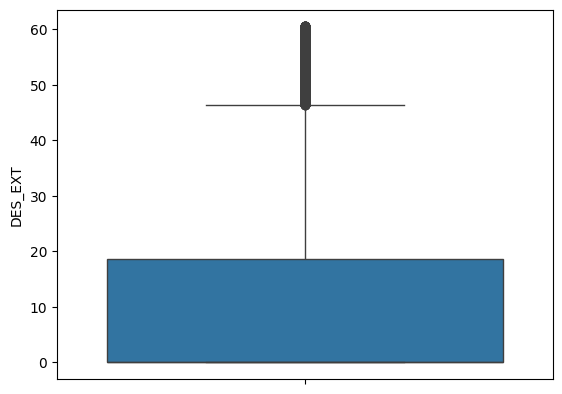

In [92]:
sns.boxplot(df_alhajas['DES_EXT'])

10-13. IMPORTE VENTA / TASA_OFERTA / PRECIO_VENTA_FINAL_SID / SALDO_INSOLUTO

<Axes: >

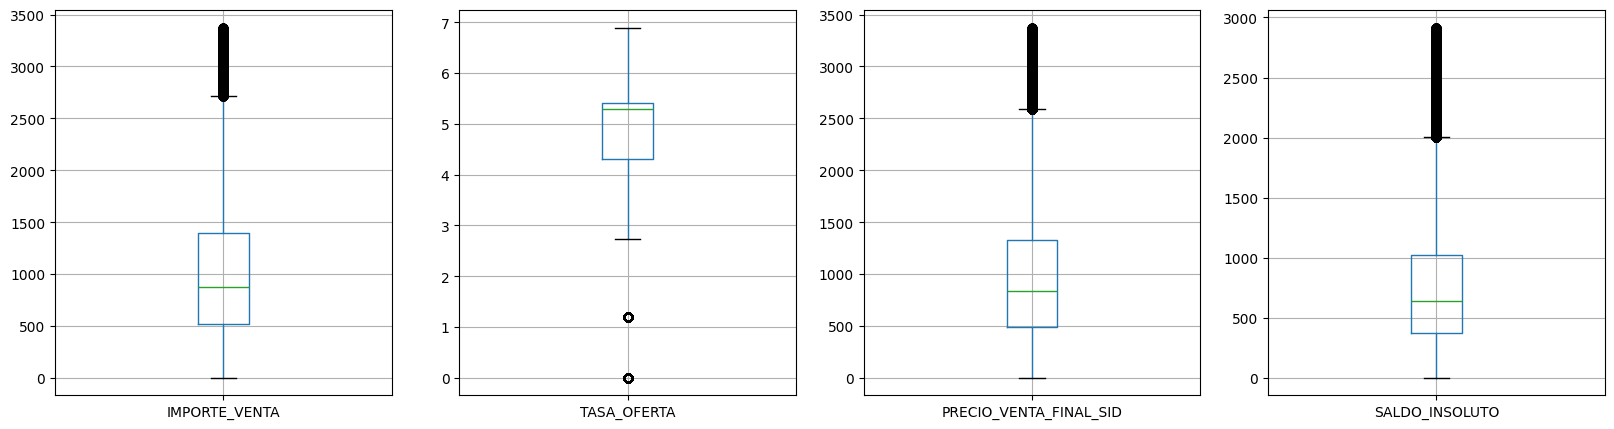

In [93]:
fig, axis = plt.subplots(1,4,figsize=(20,5))
df_alhajas.boxplot(column=['IMPORTE_VENTA'],ax=axis[0])
df_alhajas.boxplot(column=['TASA_OFERTA'],ax=axis[1])
df_alhajas.boxplot(column=['PRECIO_VENTA_FINAL_SID'],ax=axis[2])
df_alhajas.boxplot(column=['SALDO_INSOLUTO'],ax=axis[3])

IMPORTE_VENTA

In [94]:
percentile_25 = df_alhajas["IMPORTE_VENTA"].quantile(0.25)
percentile_75 = df_alhajas["IMPORTE_VENTA"].quantile(0.75)
iqr = percentile_75 - percentile_25
upper_limit = percentile_75 + 1.5 * iqr
lower_limit = percentile_25 - 1.5 * iqr
IQR_outliers = df_alhajas[(df_alhajas["IMPORTE_VENTA"] < lower_limit) | (df_alhajas["IMPORTE_VENTA"] > upper_limit)]
importe_venta_outliers = IQR_outliers['IMPORTE_VENTA']

importe_venta_outliers_df = pd.DataFrame(importe_venta_outliers)
importe_venta_outliers_df.columns = ['importe_venta']
importe_venta_outliers_df

,importe_venta
7,2820.00
107,2757.49
337,2830.81
651,2881.10
771,3113.28
...,...
1048315,3140.54
1048408,2971.81
1048437,2964.76
1048452,3224.20


In [95]:
df_alhajas.drop(importe_venta_outliers_df.index, inplace=True)

<Axes: ylabel='IMPORTE_VENTA'>

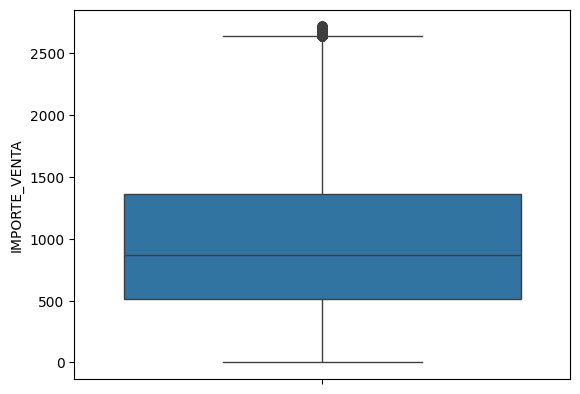

In [96]:
sns.boxplot(df_alhajas['IMPORTE_VENTA'])

**Interpretaciones**

Podemos confirmar que las variables ahora ya cuentan con el tipo de dato correcto asignado y revisamos la cantidad de valores únicos por columna. Sin embargo, existen columnas con datos faltantes por lo que haremos una imputación a las variables numéricas y variables categóricas

#Imputación de datos perdidos o inexistentes

In [98]:
numeric_feat =df_alhajas.select_dtypes(include=['int64', 'float64']).columns            # seleccionamos las columnas con tipo de dato numérico
cat_var_feat = df_alhajas.select_dtypes(include=['object']).columns                     # seleccionamos las columns con tipo de dato categórico

df_alhajas[numeric_feat] = df_alhajas[numeric_feat].apply(lambda x: x.fillna(x.median()))       # en las variables numéricas decidimos aplicar la imputación de mediana, ya que las distribuciones están sesgadas a la izquierda mayormente
df_alhajas[cat_var_feat] = df_alhajas[cat_var_feat].apply(lambda x: x.fillna(x.mode()[0]))      # decidimos aplicar imputación de moda a las variables categóricas

In [99]:
df_alhajas.isnull().sum()*100/len(df)

SUCURSAL                     0.000000
ESTADO_SUCURSAL              0.000000
ORIGEN                       0.000000
GRAMAJE                      0.000000
KILATAJE                     0.000000
FACTOR                       0.000000
VALOR_MONTE                  0.000000
VALOR_MONTE_ACTUALIZADO      0.000000
AVALUO_COMERCIAL             0.000000
PRESTAMO                     0.000000
PRECIO_VENTA_INICIAL         0.000000
PRECIO_VENTA_FINAL           0.000000
FECHA_EMPENO                38.824023
FECHA_COMERCIALIZACION      39.714470
VALOR_ANCLA_ORO              0.000000
SUBRAMO                      0.000000
REFRENDOS_REALIZADOS         0.000000
INCREMENTO                   0.000000
DESPLAZAMIENTO_COMERCIAL     0.000000
VALUADOR                     0.000000
FECHA_HORA_MOV              35.048614
INTERES                      0.000000
DES_EXT                      0.000000
IMPORTE_VENTA                0.000000
PRODUCTO                     0.000000
TASA_OFERTA                  0.000000
CANAL       

Interpretación. Podemos observar que los datos faltanates únicamente ya corresponden a las fechas, las cuales vamos a determinar más adelante el plan de acción con las mismas

#**Evaluación de correlaciones entre variables numéricas**

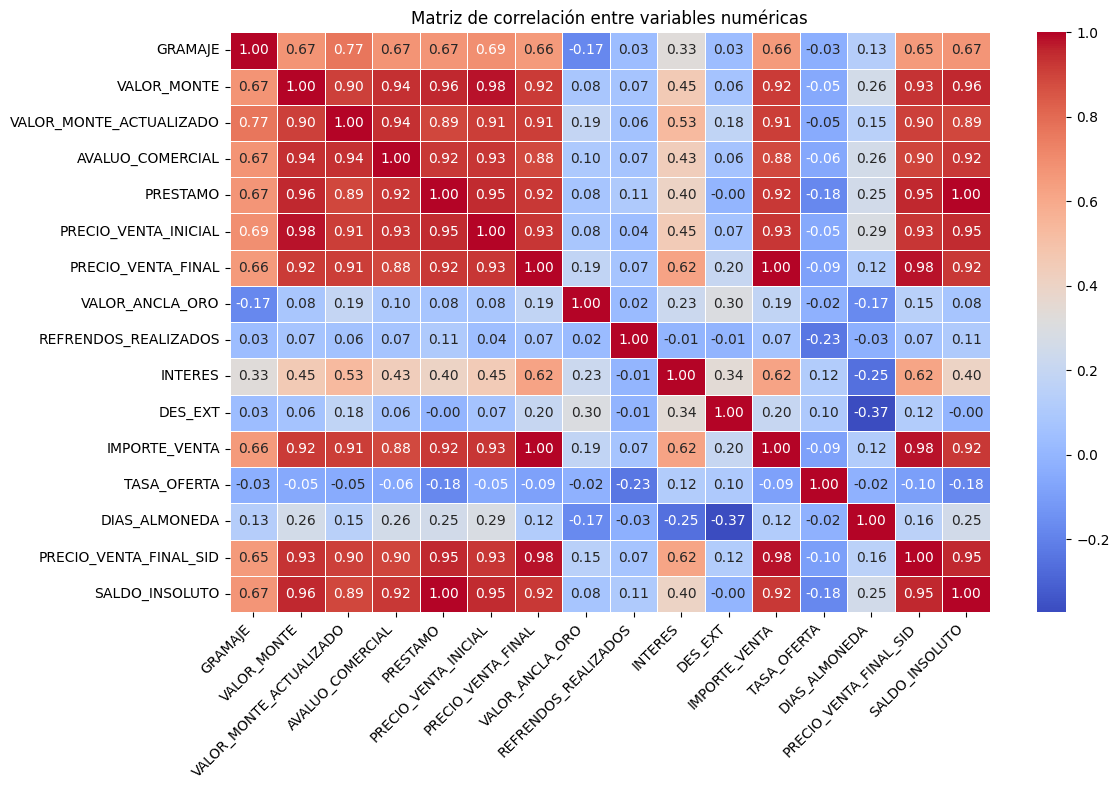

In [104]:
df_numericas = df_alhajas.select_dtypes(include=['number'])                                                                     # Selecciona solo las columnas numericas

correlation_matrix = df_numericas.corr()                                                                                # Calcula la matriz de correlación



plt.figure(figsize=(12, 8))                                                                                            # Ajusta tamaño según número de variables
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True, fmt=".2f", linewidths=0.5)                                 # Crea el mapa de calor
plt.title("Matriz de correlación entre variables numéricas")                                                            # Título
plt.xticks(rotation=45, ha='right')                                                                                     # Rotación de etiquetas
plt.yticks(rotation=0)                                                                                                  # Rotación de etiquetas
plt.tight_layout()                                                                                                      # Ajusta el espaciado
plt.show()

In [105]:
df_numericas = df_alhajas.select_dtypes(include=['number'])
corr = df_numericas.corr()                                                                                                    # Calcular la matriz de correlación

correlation_threshold = 0.8                                                                                                   # Umbral de correlación


positive_correlations = corr[corr > correlation_threshold].stack().reset_index()                                              # Extraer los pares de variables con correlaciones mayor al umbral
positive_correlations.columns = ['Variable 1', 'Variable 2', 'Correlation']                                                   # Renombrar las columnas del resultado
positive_correlations = positive_correlations[positive_correlations['Variable 1'] != positive_correlations['Variable 2']]     # Eliminar correlaciones redundatnes entre la misma variable

negative_correlations = corr[corr < -correlation_threshold].stack().reset_index()                                             # Extraer solo los pares de variables con correlacion menor que el umbral negativo
negative_correlations.columns = ['Variable 1', 'Variable 2', 'Correlation']
negative_correlations = negative_correlations[negative_correlations['Variable 1'] != negative_correlations['Variable 2']]     # Eliminar autocorrelaciones

print("Correlaciones Positivas Fuertes (> 0.7):")                                                                             # Imprime las correlaciones positivas y negativas
print(positive_correlations.sort_values(by='Correlation', ascending=False))

print("\ Correlaciones Negativas Fuertes (< -0.7):")
print(negative_correlations.sort_values(by='Correlation', ascending=True))

<>:18: SyntaxWarning: invalid escape sequence '\ '
<>:18: SyntaxWarning: invalid escape sequence '\ '
C:\Users\HP\AppData\Local\Temp\ipykernel_13496\2596434951.py:18: SyntaxWarning: invalid escape sequence '\ '
  print("\ Correlaciones Negativas Fuertes (< -0.7):")


Correlaciones Positivas Fuertes (> 0.7):
            Variable 1               Variable 2  Correlation
52  PRECIO_VENTA_FINAL            IMPORTE_VENTA     0.999970
64       IMPORTE_VENTA       PRECIO_VENTA_FINAL     0.999970
36            PRESTAMO           SALDO_INSOLUTO     0.999886
82      SALDO_INSOLUTO                 PRESTAMO     0.999886
53  PRECIO_VENTA_FINAL   PRECIO_VENTA_FINAL_SID     0.979859
..                 ...                      ...          ...
80      SALDO_INSOLUTO  VALOR_MONTE_ACTUALIZADO     0.887623
48  PRECIO_VENTA_FINAL         AVALUO_COMERCIAL     0.882484
24    AVALUO_COMERCIAL       PRECIO_VENTA_FINAL     0.882484
61       IMPORTE_VENTA         AVALUO_COMERCIAL     0.882468
25    AVALUO_COMERCIAL            IMPORTE_VENTA     0.882468

[72 rows x 3 columns]
\ Correlaciones Negativas Fuertes (< -0.7):
Empty DataFrame
Columns: [Variable 1, Variable 2, Correlation]
Index: []


#**Transformación de variables numéricas**

Nuestra variable de salida u objetivo se denomina DIAS_ALMONEDA, que son los días que transcurren entre que llega el artículo y la fecha de movimiento (venta). Vamos a observar su distribución

<Axes: xlabel='DIAS_ALMONEDA', ylabel='Count'>

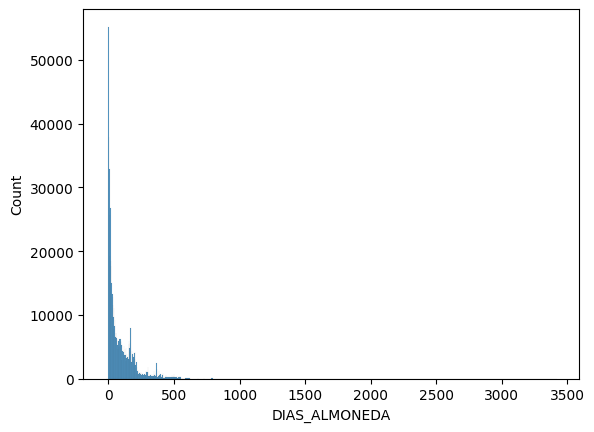

In [106]:

sns.histplot(df_alhajas, x='DIAS_ALMONEDA')

Podemos visualizar que el rango de la variable objetivo no tiene una distribución normal, y efectivamente gran parte de las observaciones se encuentra en un rango de más de 151 días, lo que nos demuestra la lenta rotación de artículos.

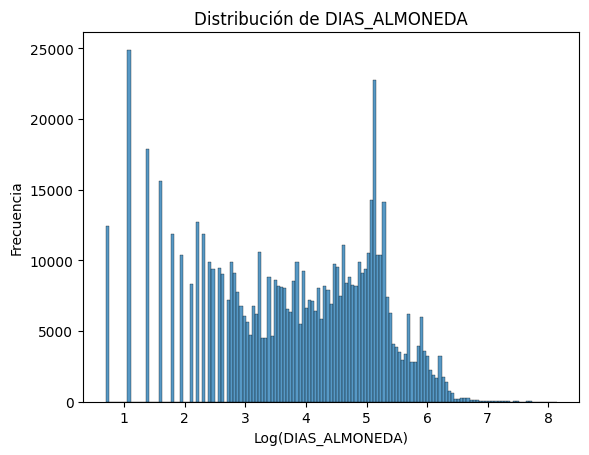

In [107]:
sample_df = df_alhajas[df_alhajas['DIAS_ALMONEDA'] >=0]                            # Filtrar solo los valores positivos
sample_df = sample_df.dropna(subset=['DIAS_ALMONEDA'])                           # Eliminar filas con valores faltantes en 'DIAS_ALMONEDA'

sample_df['DIAS_ALMONEDA_LOG'] = np.log1p(sample_df['DIAS_ALMONEDA'])            # Aplicar logaritmo a la columna 'DIAS_ALMONEDA'
sns.histplot(sample_df, x='DIAS_ALMONEDA_LOG')
plt.xlabel('Log(DIAS_ALMONEDA)')                                                  # Etiqueta del eje x
plt.ylabel('Frecuencia')                                                          # Etiqueta del eje y
plt.title('Distribución de DIAS_ALMONEDA')                                        # Título del gráfico
plt.show()

**Justificación del uso de transformación logarítmica en DIAS_ALMONEDA**

La variable DIAS_ALMONEDA representa el número de días que un artículo ha permanecido en inventario, y presenta una distribución altamente sesgada a la derecha, donde la mayoria de los valores se concentran cerca de cero y existen valores extremos mucho mayores. Para abordar el sesgo se aplicó una transformacion logarítmica que reduce el impacto de valores extremos, viendo que la distribución sea más simétrica y adecuada para el modelo.

In [102]:
#df = df[df['DIAS_ALMONEDA'] >= 0]                                                 # Filtrar solo los valores positivos
#df = df.dropna(subset=['DIAS_ALMONEDA'])                                          # Eliminar filas con valores faltantes en 'DIAS_ALMONEDA'
#df['DIAS_ALMONEDA_LOG'] = np.log1p(df['DIAS_ALMONEDA'])                           # Aplicar transformacion logaritmica al DF procesado


A continuación vamos a revisar las distribuciones de nuestras variables numéricas para revisar si aplica el escalamiento y transformación

In [108]:
num_var_list = ['GRAMAJE','VALOR_MONTE','VALOR_MONTE_ACTUALIZADO','AVALUO_COMERCIAL','PRESTAMO', 'PRECIO_VENTA_INICIAL','PRECIO_VENTA_FINAL','VALOR_ANCLA_ORO']


In [109]:
num_var_list_2 = ['REFRENDOS_REALIZADOS','INTERES','DES_EXT','IMPORTE_VENTA','TASA_OFERTA','PRECIO_VENTA_FINAL_SID','SALDO_INSOLUTO']

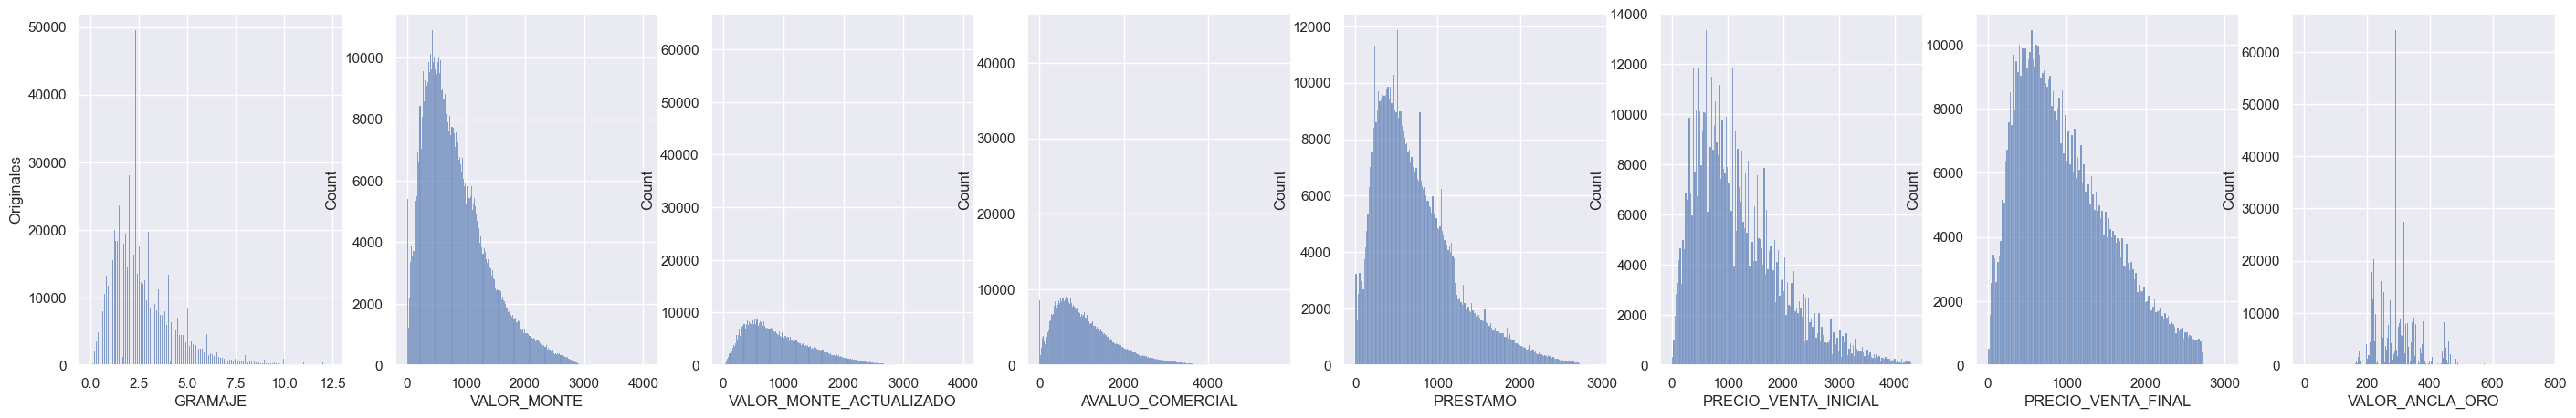

In [110]:
sns.set(rc={'figure.figsize':(35,5)})
fig, axes = plt.subplots(1,8)
for k in range(0,8):
# Datos originales
  plt.subplot(1,8, k+1)

  Transf0 = df_alhajas[num_var_list[k]]
  sns.histplot(Transf0)
  plt.xlabel(num_var_list[k])
  if k == 0:
    plt.ylabel('Originales')

plt.show()

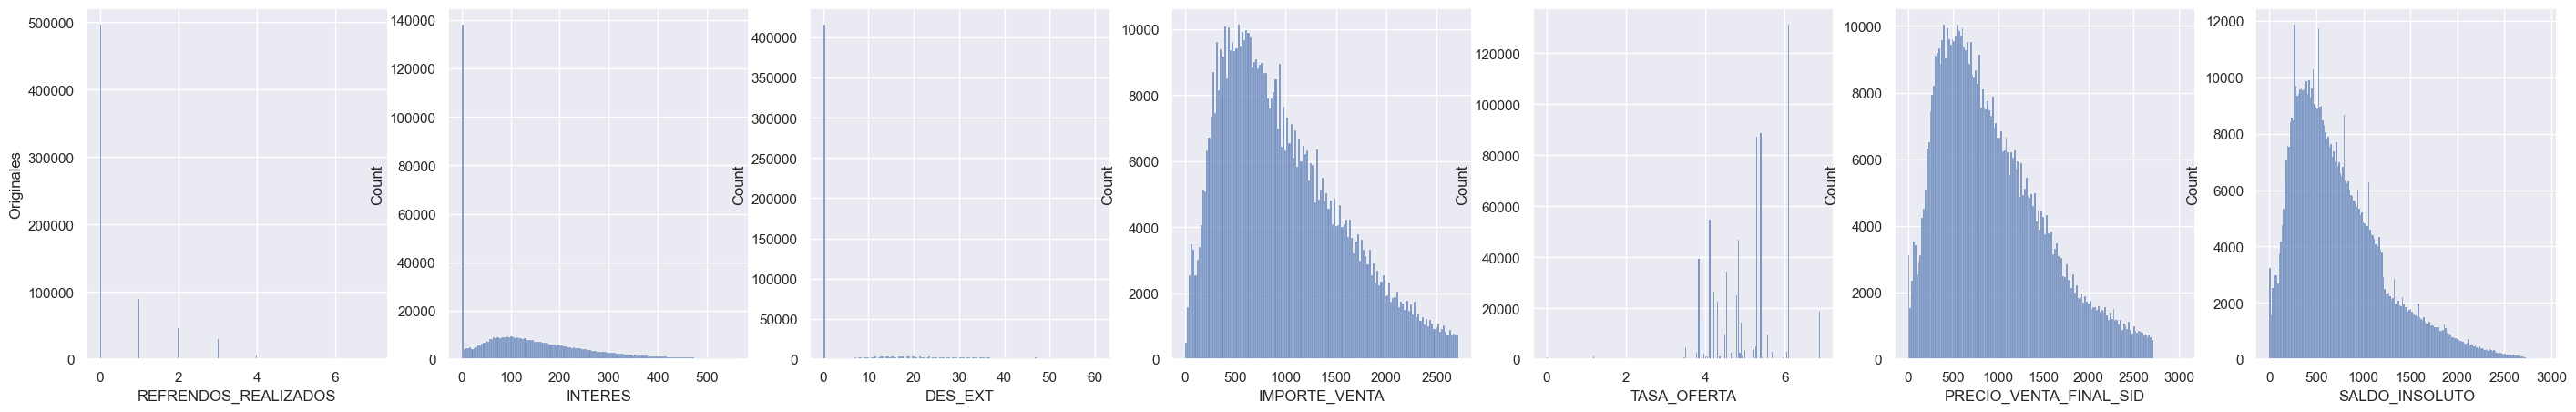

In [111]:
sns.set(rc={'figure.figsize':(35,5)})
fig, axes = plt.subplots(1,7)
for k in range(0,7):
# Datos originales
  plt.subplot(1,7, k+1)

  Transf0 = df_alhajas[num_var_list_2[k]]
  sns.histplot(Transf0)
  plt.xlabel(num_var_list_2[k])
  if k == 0:
    plt.ylabel('Originales')

plt.show()

Interpretación: Podemos observar que prácticamente todas las variables numéricas cuentan con un sesgo a la izquierda, por lo que primero vamos a aplicar es una transformación  *Yeo-Johnson*,que se puede utilizar en variables con valores cero y negativos, así como valores positivos. Posteriormente aplicaremos un escalamiento Min-Max.

In [112]:
df_1 = df_alhajas.copy()
transformer = PowerTransformer(method="yeo-johnson")
transformer.fit(df_1[['GRAMAJE','VALOR_MONTE','VALOR_MONTE_ACTUALIZADO','AVALUO_COMERCIAL','PRESTAMO', 'PRECIO_VENTA_INICIAL','PRECIO_VENTA_FINAL','VALOR_ANCLA_ORO',
                      'REFRENDOS_REALIZADOS','INTERES','DES_EXT','IMPORTE_VENTA','TASA_OFERTA','PRECIO_VENTA_FINAL_SID','SALDO_INSOLUTO']])
transf = transformer.transform(df_1[['GRAMAJE','VALOR_MONTE','VALOR_MONTE_ACTUALIZADO','AVALUO_COMERCIAL','PRESTAMO', 'PRECIO_VENTA_INICIAL','PRECIO_VENTA_FINAL','VALOR_ANCLA_ORO',
                      'REFRENDOS_REALIZADOS','INTERES','DES_EXT','IMPORTE_VENTA','TASA_OFERTA','PRECIO_VENTA_FINAL_SID','SALDO_INSOLUTO']])

In [113]:
transf_df = pd.DataFrame(transf)
transf_df.columns = ['GRAMAJE','VALOR_MONTE','VALOR_MONTE_ACTUALIZADO','AVALUO_COMERCIAL','PRESTAMO', 'PRECIO_VENTA_INICIAL','PRECIO_VENTA_FINAL','VALOR_ANCLA_ORO',
                      'REFRENDOS_REALIZADOS','INTERES','DES_EXT','IMPORTE_VENTA','TASA_OFERTA','PRECIO_VENTA_FINAL_SID','SALDO_INSOLUTO']
transf_df

,GRAMAJE,VALOR_MONTE,VALOR_MONTE_ACTUALIZADO,AVALUO_COMERCIAL,PRESTAMO,PRECIO_VENTA_INICIAL,PRECIO_VENTA_FINAL,VALOR_ANCLA_ORO,REFRENDOS_REALIZADOS,INTERES,DES_EXT,IMPORTE_VENTA,TASA_OFERTA,PRECIO_VENTA_FINAL_SID,SALDO_INSOLUTO
0,0.917999,-2.988719,-0.013341,-0.031315,1.150697,0.356681,1.156222,0.033758,-0.588153,-1.599691,-0.769845,1.156267,-1.822290,0.733604,1.151016
1,-0.003601,-2.988719,-0.013341,-0.031315,0.208352,-0.442794,0.546892,0.033758,-0.588153,-1.599691,-0.769845,0.546924,-1.822290,-0.172625,0.208612
2,-0.003601,-2.988719,-0.013341,-0.031315,1.538468,0.679301,1.625761,0.033758,-0.588153,-1.599691,-0.769845,1.625817,-1.822290,1.115627,1.538812
3,2.765861,-2.988719,-0.013341,-2.842421,-3.221828,0.723637,1.100091,0.033758,-0.588153,-1.599691,-0.769845,1.100135,-0.297952,-3.040906,-3.221752
4,0.917999,-2.988719,-0.013341,-2.842421,-3.221828,-2.100710,-1.945891,0.033758,-0.588153,-1.599691,-0.769845,-1.945884,-0.297952,-3.040906,-3.221752
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
667331,-0.003601,1.420454,-0.013341,-0.031315,1.289533,1.502064,0.999040,0.033758,1.775179,0.457633,-0.769845,0.999082,-1.390804,1.066378,1.289861
667332,0.831522,0.796803,0.837600,0.915139,0.434683,0.745992,0.927195,-0.600593,1.611455,1.448791,-0.769845,0.927235,1.261510,0.993634,0.434956
667333,0.786587,0.871505,1.051470,0.993275,1.086315,0.817441,1.211472,-0.304504,1.775179,1.307515,1.414928,1.211519,0.251266,1.281900,1.086630
667334,0.065759,0.469133,0.164289,0.574020,0.338767,0.425600,0.584197,0.096411,-0.588153,0.838107,-0.769845,0.584230,0.375949,0.647413,0.339035


In [114]:
scaler = preprocessing.StandardScaler().fit(transf_df[['GRAMAJE','VALOR_MONTE','VALOR_MONTE_ACTUALIZADO','AVALUO_COMERCIAL','PRESTAMO', 'PRECIO_VENTA_INICIAL','PRECIO_VENTA_FINAL','VALOR_ANCLA_ORO',
                      'REFRENDOS_REALIZADOS','INTERES','DES_EXT','IMPORTE_VENTA','TASA_OFERTA','PRECIO_VENTA_FINAL_SID','SALDO_INSOLUTO']])
scaler= scaler.transform(transf_df[['GRAMAJE','VALOR_MONTE','VALOR_MONTE_ACTUALIZADO','AVALUO_COMERCIAL','PRESTAMO', 'PRECIO_VENTA_INICIAL','PRECIO_VENTA_FINAL','VALOR_ANCLA_ORO',
                      'REFRENDOS_REALIZADOS','INTERES','DES_EXT','IMPORTE_VENTA','TASA_OFERTA','PRECIO_VENTA_FINAL_SID','SALDO_INSOLUTO']])

In [115]:
scaler_df = pd.DataFrame(scaler)
scaler_df.columns=['GRAMAJE','VALOR_MONTE','VALOR_MONTE_ACTUALIZADO','AVALUO_COMERCIAL','PRESTAMO', 'PRECIO_VENTA_INICIAL','PRECIO_VENTA_FINAL','VALOR_ANCLA_ORO',
                      'REFRENDOS_REALIZADOS','INTERES','DES_EXT','IMPORTE_VENTA','TASA_OFERTA','PRECIO_VENTA_FINAL_SID','SALDO_INSOLUTO']
scaler_df

,GRAMAJE,VALOR_MONTE,VALOR_MONTE_ACTUALIZADO,AVALUO_COMERCIAL,PRESTAMO,PRECIO_VENTA_INICIAL,PRECIO_VENTA_FINAL,VALOR_ANCLA_ORO,REFRENDOS_REALIZADOS,INTERES,DES_EXT,IMPORTE_VENTA,TASA_OFERTA,PRECIO_VENTA_FINAL_SID,SALDO_INSOLUTO
0,0.917999,-2.988719,-0.013341,-0.031315,1.150697,0.356681,1.156222,0.033758,-0.588153,-1.599691,-0.769845,1.156267,-1.822290,0.733604,1.151016
1,-0.003601,-2.988719,-0.013341,-0.031315,0.208352,-0.442794,0.546892,0.033758,-0.588153,-1.599691,-0.769845,0.546924,-1.822290,-0.172625,0.208612
2,-0.003601,-2.988719,-0.013341,-0.031315,1.538468,0.679301,1.625761,0.033758,-0.588153,-1.599691,-0.769845,1.625817,-1.822290,1.115627,1.538812
3,2.765861,-2.988719,-0.013341,-2.842421,-3.221828,0.723637,1.100091,0.033758,-0.588153,-1.599691,-0.769845,1.100135,-0.297952,-3.040906,-3.221752
4,0.917999,-2.988719,-0.013341,-2.842421,-3.221828,-2.100710,-1.945891,0.033758,-0.588153,-1.599691,-0.769845,-1.945884,-0.297952,-3.040906,-3.221752
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
667331,-0.003601,1.420454,-0.013341,-0.031315,1.289533,1.502064,0.999040,0.033758,1.775179,0.457633,-0.769845,0.999082,-1.390804,1.066378,1.289861
667332,0.831522,0.796803,0.837600,0.915139,0.434683,0.745992,0.927195,-0.600593,1.611455,1.448791,-0.769845,0.927235,1.261510,0.993634,0.434956
667333,0.786587,0.871505,1.051470,0.993275,1.086315,0.817441,1.211472,-0.304504,1.775179,1.307515,1.414928,1.211519,0.251266,1.281900,1.086630
667334,0.065759,0.469133,0.164289,0.574020,0.338767,0.425600,0.584197,0.096411,-0.588153,0.838107,-0.769845,0.584230,0.375949,0.647413,0.339035


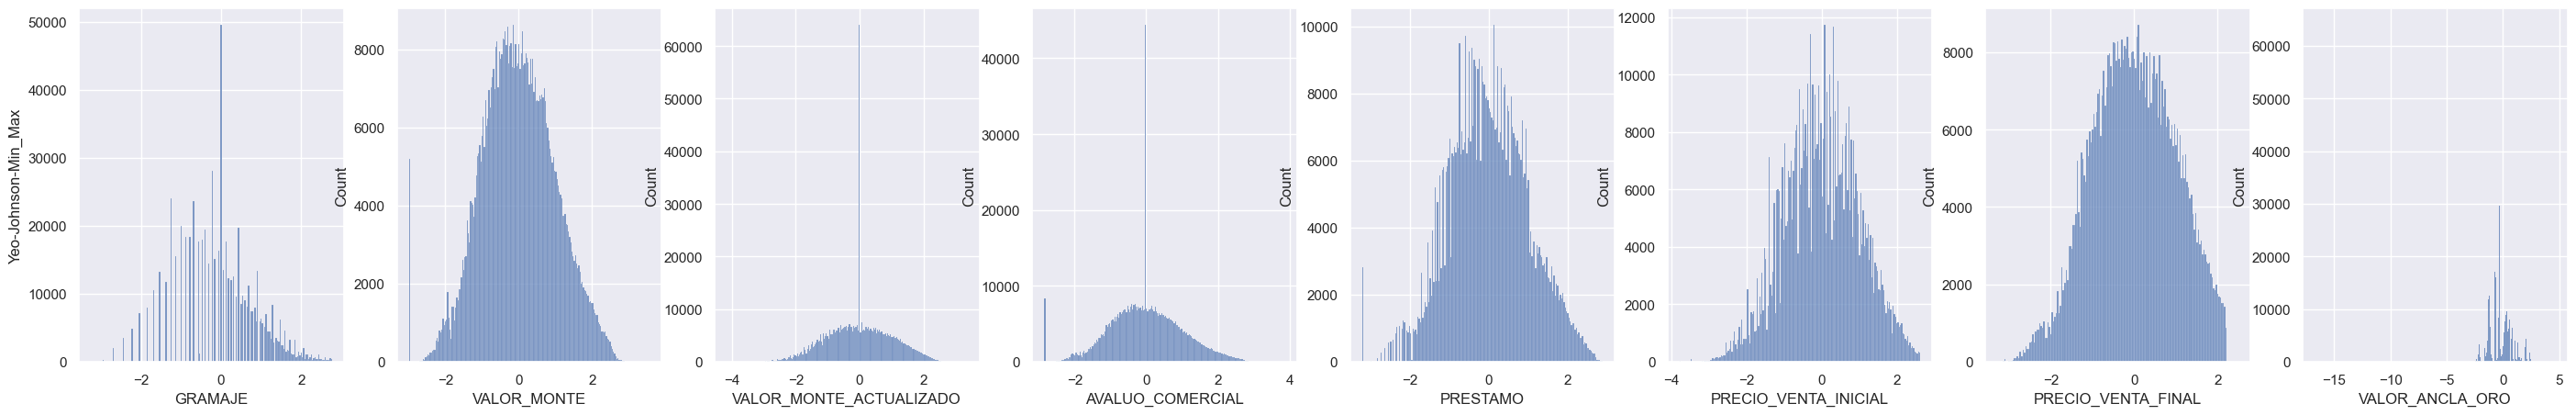

In [116]:
sns.set(rc={'figure.figsize':(35,5)})
fig, axes = plt.subplots(1,8)
for k in range(0,8):
# Datos originales
  plt.subplot(1,8, k+1)

  Transf2 = scaler_df[num_var_list[k]]
  sns.histplot(Transf2)
  plt.xlabel(num_var_list[k])
  if k == 0:
    plt.ylabel('Yeo-Johnson-Min_Max')

plt.show()

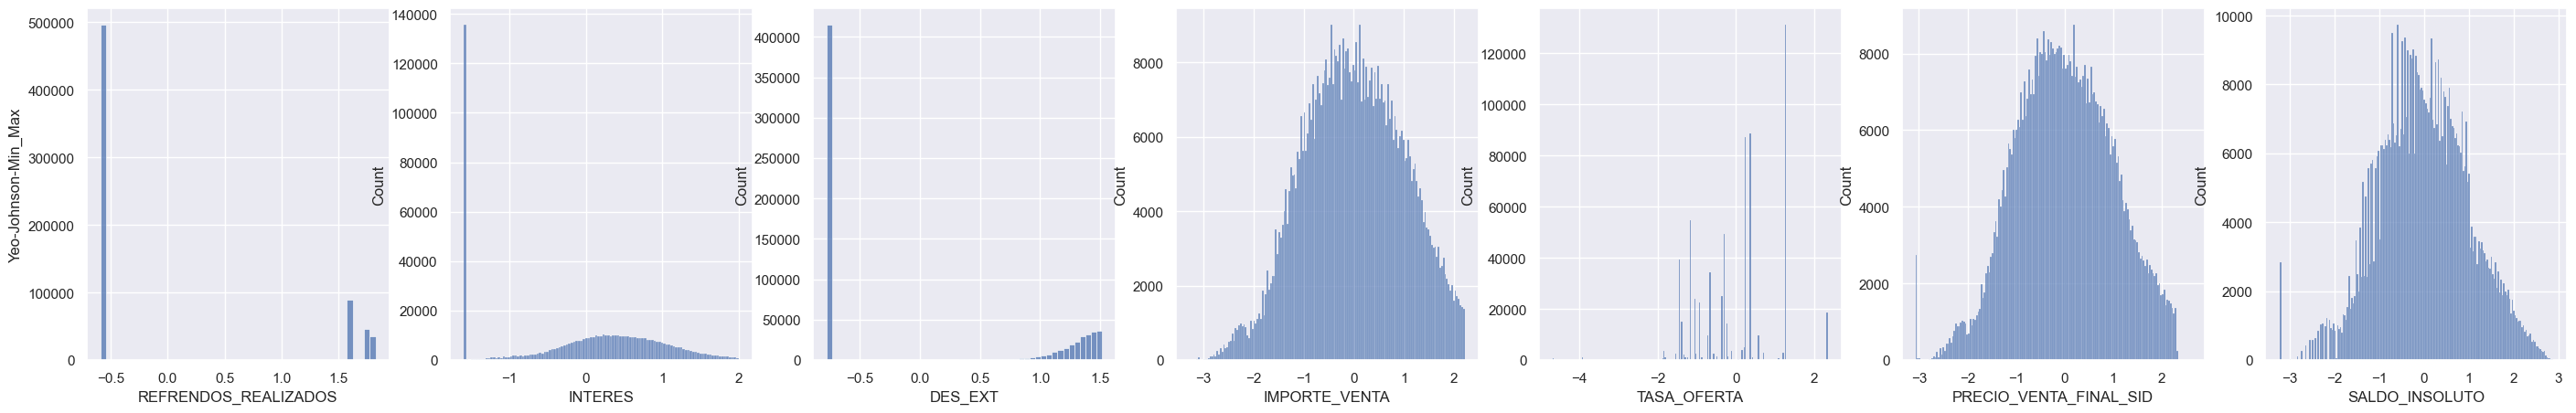

In [117]:
sns.set(rc={'figure.figsize':(35,5)})
fig, axes = plt.subplots(1,7)
for k in range(0,7):
# Datos originales
  plt.subplot(1,7, k+1)

  Transf2 = scaler_df[num_var_list_2[k]]
  sns.histplot(Transf2)
  plt.xlabel(num_var_list_2[k])
  if k == 0:
    plt.ylabel('Yeo-Johnson-Min_Max')

plt.show()

Podemos observar que las distribuciones de las variables numéricas considerando nuestra variable target, son prácticamente normales mayormente.

#**Transformación de variables categóricas**

Antes de iniciar con la transformación de variables categóricas, es importante separar en dos listas las variables con alta cardinalidad y las variables con baja cardinalidad. Vamos a empezar con las de baja cardinalidad

In [118]:
r = df_alhajas.describe(include=object).T
moda = r['top'].dtype

In [119]:
few_cardinal = r[r['unique'] <= 100].index
few_cardinal_variables = df_alhajas[few_cardinal]
few_cardinal_variables

,ESTADO_SUCURSAL,ORIGEN,KILATAJE,FACTOR,SUBRAMO,INCREMENTO,DESPLAZAMIENTO_COMERCIAL,PRODUCTO,CANAL,TIPO_PRENDA
0,CIUDAD DE MÃXICO,SIVA,14,F3,Alhajas,25,0,CL,Aprovechamiento Institucion,anillo
1,CIUDAD DE MÃXICO,MIDAS,nan,nan,Diamantes,nan,nan,CL,Aprovechamiento Institucion,anillo
2,CIUDAD DE MÃXICO,MIDAS,nan,nan,Diamantes,nan,nan,CL,Aprovechamiento Institucion,churumbela
4,CIUDAD DE MÃXICO,SIVA,8,F2,Alhajas,10,0,CL,Anticipado Ventanilla,otros
5,CIUDAD DE MÃXICO,SIVA,14,F1,Alhajas,0,0,CL,Anticipado Ventanilla,pendiente
...,...,...,...,...,...,...,...,...,...,...
1048568,SAN LUIS POTOSÃ,MIDAS,nan,nan,Diamantes,nan,nan,CL,Cumplido,anillo
1048569,NUEVO LEÃN,SIVA,10,F4,Alhajas,40,0,CL,Cumplido,arracada
1048570,YUCATÃN,SIVA,10,F4,Alhajas,50,0,CL,Cumplido,pulsera
1048571,PUEBLA,SIVA,14,F4,Alhajas,30,0,CL,Cumplido,anillo


Vamos a visualizar, en gráficos de barra la frecuencia de las categorías de las variables con baja cardinalidad

C:\Users\HP\AppData\Local\Temp\ipykernel_13496\1714097293.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plot.set_xticklabels(plot.get_xticklabels(), rotation=60, ha='right', fontsize=8)
C:\Users\HP\AppData\Local\Temp\ipykernel_13496\1714097293.py:24: UserWarning: Glyph 137 (\x89) missing from font(s) Arial.
  plt.tight_layout(rect=[0,0,1,0.97])
C:\Users\HP\AppData\Local\Temp\ipykernel_13496\1714097293.py:24: UserWarning: Glyph 147 (\x93) missing from font(s) Arial.
  plt.tight_layout(rect=[0,0,1,0.97])
C:\Users\HP\AppData\Local\Temp\ipykernel_13496\1714097293.py:24: UserWarning: Glyph 129 (\x81) missing from font(s) Arial.
  plt.tight_layout(rect=[0,0,1,0.97])
C:\Users\HP\AppData\Local\Temp\ipykernel_13496\1714097293.py:24: UserWarning: Glyph 141 (\x8d) missing from font(s) Arial.
  plt.tight_layout(rect=[0,0,1,0.97])
C:\Users\HP\AppData\Local\Temp\ipykernel_13496\1714097293.py:22: UserWarning: s

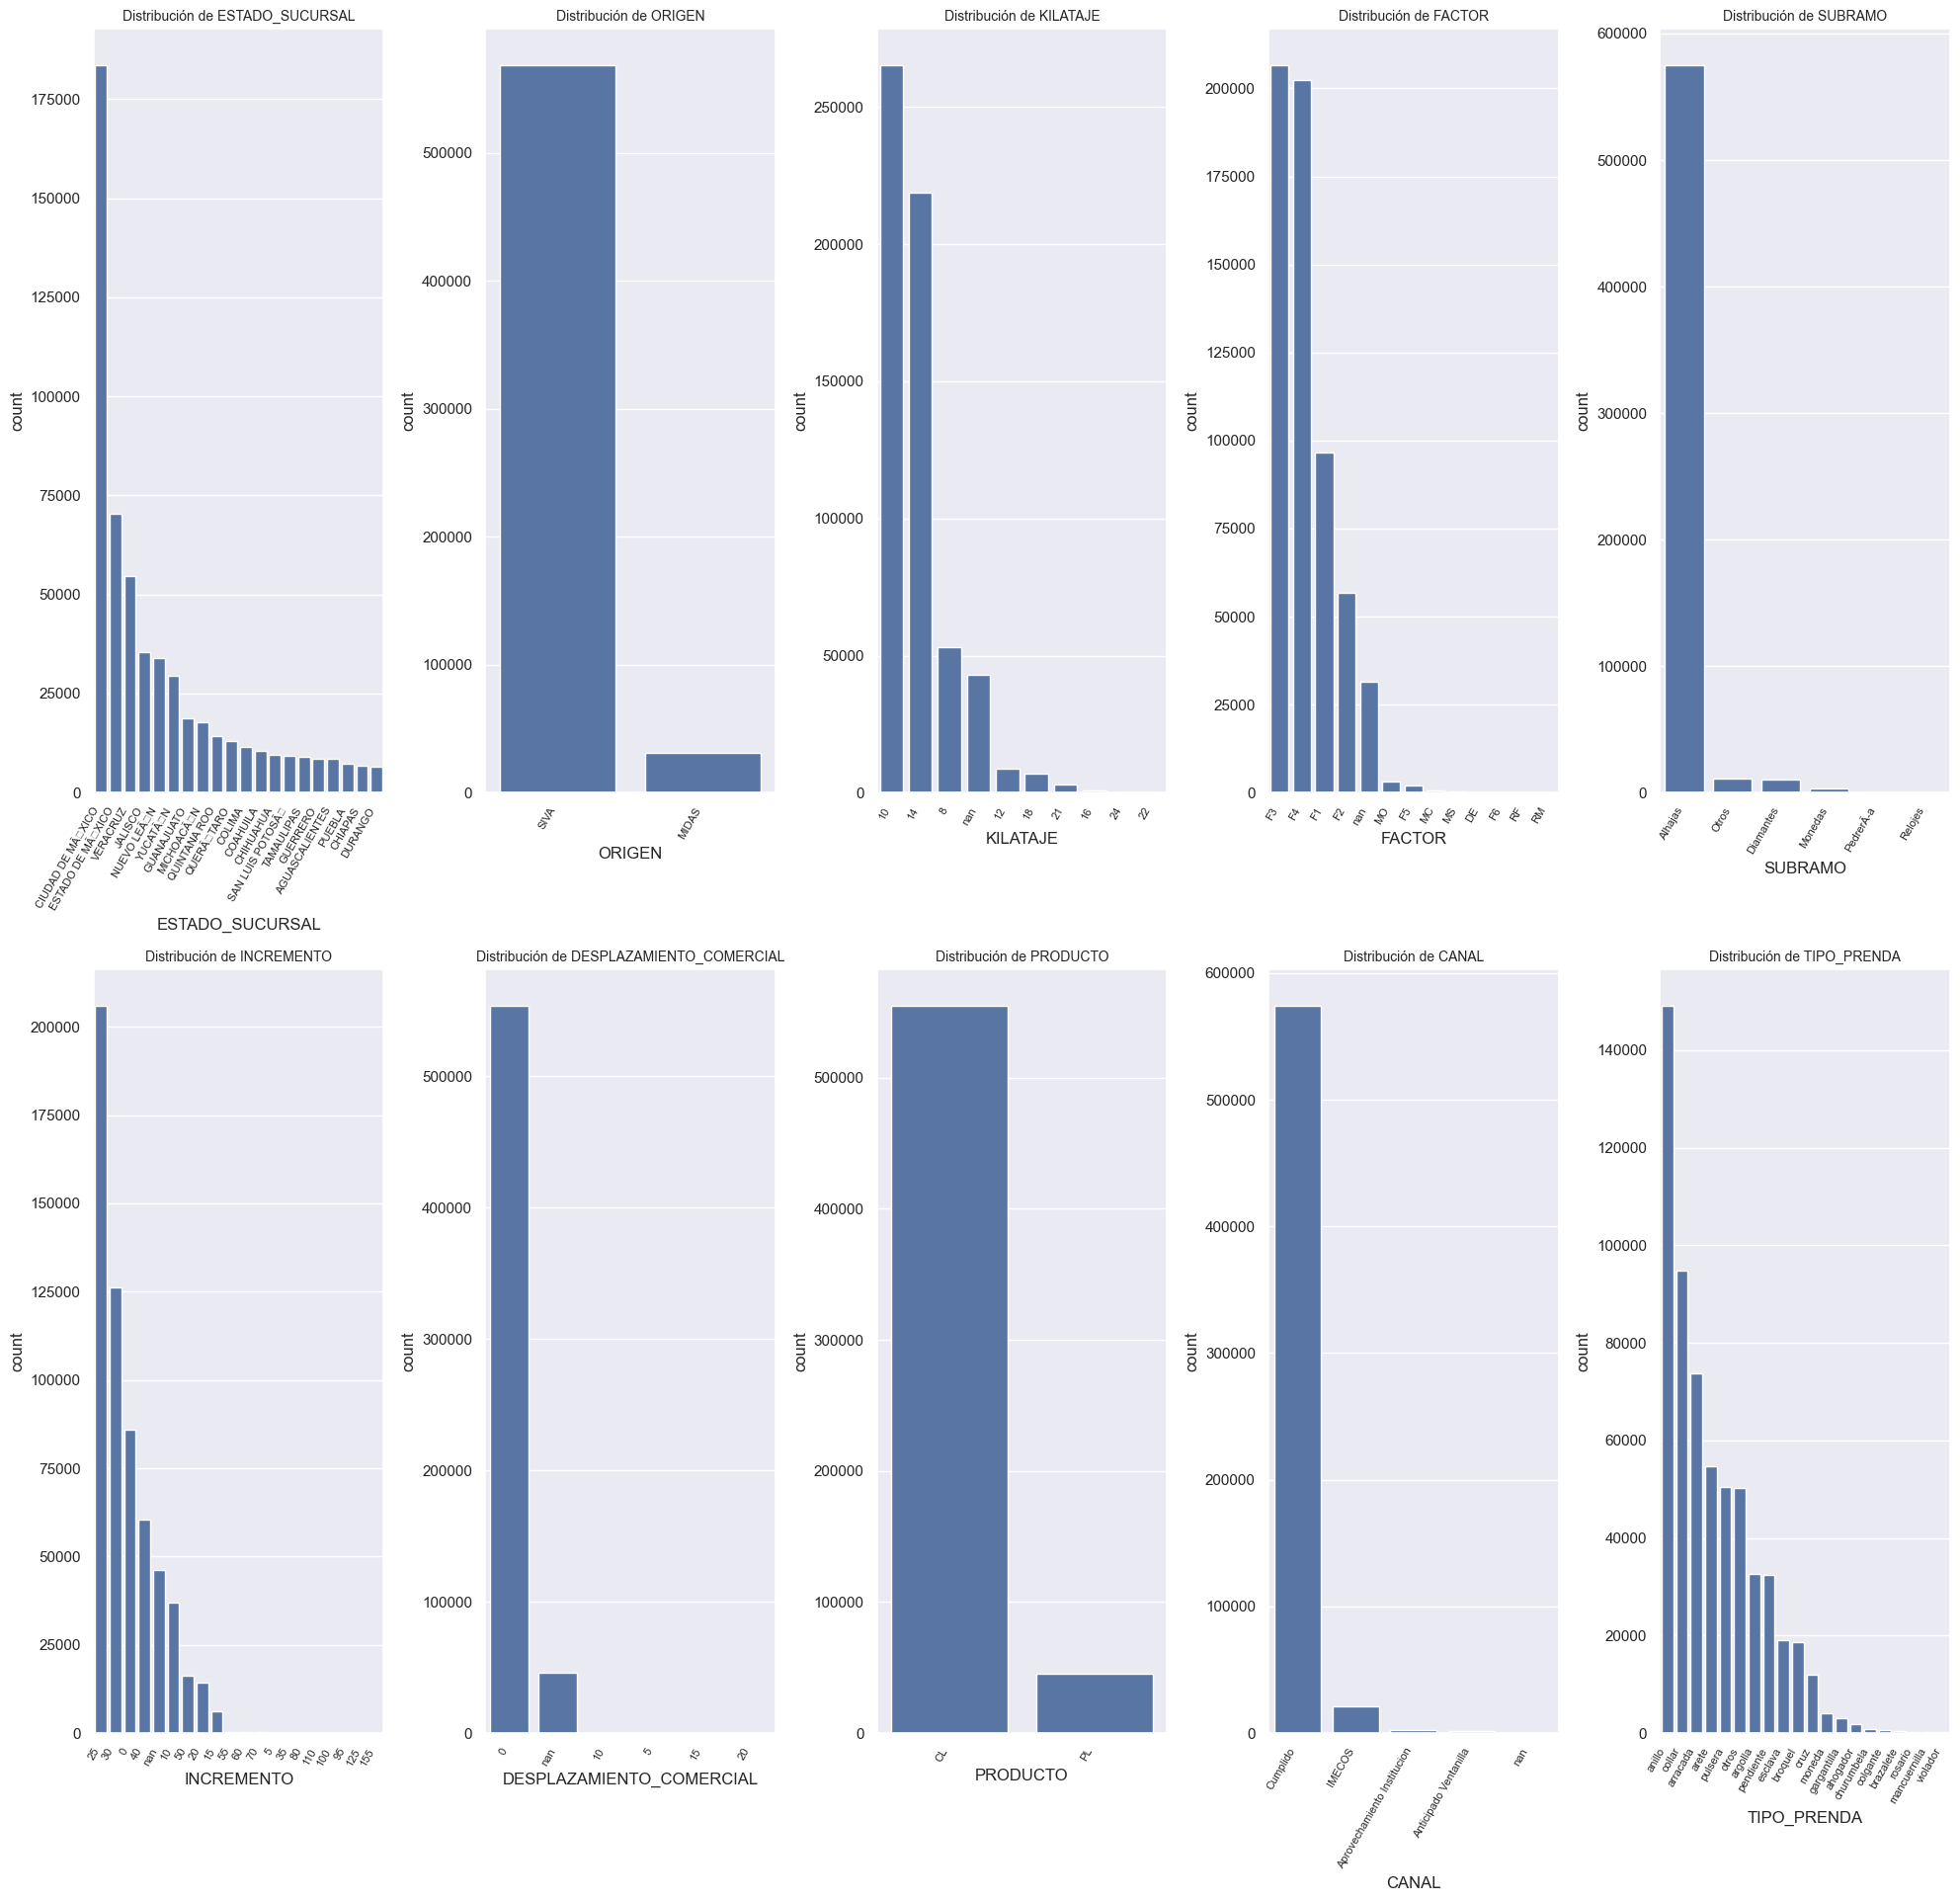

In [120]:
sample_df_2 = few_cardinal_variables.sample(600000)

# Create subplots
fig, axis = plt.subplots(2, 5, figsize=(20, 20))

# Define the variables to plot
variables = ['ESTADO_SUCURSAL','ORIGEN','KILATAJE',
              'FACTOR','SUBRAMO','INCREMENTO', 'DESPLAZAMIENTO_COMERCIAL',
              'PRODUCTO','CANAL', 'TIPO_PRENDA']


for i, var in enumerate(variables):
    row = i // 5
    col = i % 5
    ax = axis[row, col]


    top_categories = sample_df_2[var].value_counts().nlargest(20).index
    filtered_data = sample_df_2[sample_df_2[var].isin(top_categories)]

    plot = sns.countplot(x=var, data=filtered_data, ax=ax, order=top_categories)
    plot.set_xticklabels(plot.get_xticklabels(), rotation=60, ha='right', fontsize=8)
    ax.set_title(f'Distribución de {var}', fontsize=10)
    plt.tight_layout(rect=[0,0,1,0.97])

plt.show()



Posteriormente vamos a aplicar la codificación *one hot a las variables de baja cardinalidad. Consideremos que esta codificación agrega más columnas al dataset por cada valor único. En nuestro caso tenemos más variables con baja cardinalidad que alta cardinalidad

In [121]:
encoder = OneHotEncoder(drop='first',sparse_output=False)
encoded_data = encoder.fit_transform(few_cardinal_variables)

In [122]:
onehot_df = pd.DataFrame(encoded_data)
onehot_df.columns = encoder.get_feature_names_out()
onehot_df

,ESTADO_SUCURSAL_BAJA CALIFORNIA NORTE,ESTADO_SUCURSAL_BAJA CALIFORNIA SUR,ESTADO_SUCURSAL_CAMPECHE,ESTADO_SUCURSAL_CHIAPAS,ESTADO_SUCURSAL_CHIHUAHUA,ESTADO_SUCURSAL_CIUDAD DE MÃXICO,ESTADO_SUCURSAL_COAHUILA,ESTADO_SUCURSAL_COLIMA,ESTADO_SUCURSAL_DURANGO,ESTADO_SUCURSAL_ESTADO DE MÃXICO,...,TIPO_PRENDA_moneda,TIPO_PRENDA_nan,TIPO_PRENDA_otros,TIPO_PRENDA_pendiente,TIPO_PRENDA_pluma,TIPO_PRENDA_pulsera,TIPO_PRENDA_reloj,TIPO_PRENDA_rosario,TIPO_PRENDA_telÃ©fono,TIPO_PRENDA_violador
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
667331,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
667332,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
667333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
667334,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Posteriormente vamos a aplicar codificación binaria a las variables con alta cardinalidad, la transformación será BinaryEncoder para que el modelo se más eficiente para evaluar los datos y distribuciones de las variables

In [123]:
high_cardinal = r[r['unique'] > 100].index
highly_cardinal_variables = df_alhajas[high_cardinal]
highly_cardinal_variables

,SUCURSAL,VALUADOR
0,1005,0
1,1005,0
2,1005,0
4,278,2010538
5,278,2010538
...,...,...
1048568,120,1996128
1048569,324,2002617
1048570,28,1984026
1048571,229,2001188


In [120]:
highly_cardinal_variables.drop(['VALUADOR'],axis=1,inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_11892\3784603194.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  highly_cardinal_variables.drop(['VALUADOR'],axis=1,inplace=True)


In [121]:
encoder = BinaryEncoder()
encoded_data= encoder.fit_transform(highly_cardinal_variables)

In [122]:
binary_df = pd.DataFrame(encoded_data)
binary_df.columns = encoder.get_feature_names_out()
binary_df

,SUCURSAL_0,SUCURSAL_1,SUCURSAL_2,SUCURSAL_3,SUCURSAL_4,SUCURSAL_5,SUCURSAL_6,SUCURSAL_7,SUCURSAL_8
0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,1,0
5,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...
1048568,0,0,1,1,1,0,1,0,1
1048569,0,0,0,0,1,1,1,1,1
1048570,0,1,0,1,0,0,0,0,0
1048571,1,0,0,0,1,1,1,0,1


#**Aplicación de PCA a variables numéricas**

La aplicación de Principal Component Analysis, considte en reducir la dimensionalidad de un dataset para mejorar la eficiencia de un modelo de machine learning como el que estaremos aplicando al problema, es importante mencionar que previo a aplicar el método de PCA, se requiere escalar las variables numércias, ya que la varianza es sensible a la magnitud de los datos, etapa que ya se realizó anteriormente. Se requiere que mayormente la media sea cero y su varianza de 1

In [132]:
pca = PCA()
scaler_df_projected = pca.fit_transform(scaler_df)
top_features = np.abs(pca.components_).argmax(axis=1)
component_names = [ f'PC{i+1}_{scaler_df.columns[top_features[i]]}' for i in range(pca.n_components_)]
scaler_df_projected = pd.DataFrame(scaler_df_projected, columns=component_names)
scaler_df_projected.head(5)

,PC1_PRECIO_VENTA_FINAL_SID,PC2_DES_EXT,PC3_REFRENDOS_REALIZADOS,PC4_VALOR_ANCLA_ORO,PC5_TASA_OFERTA,PC6_INTERES,PC7_GRAMAJE,PC8_AVALUO_COMERCIAL,PC9_VALOR_MONTE,PC10_VALOR_MONTE,PC11_PRECIO_VENTA_INICIAL,PC12_VALOR_MONTE_ACTUALIZADO,PC13_PRECIO_VENTA_FINAL_SID,PC14_SALDO_INSOLUTO,PC15_PRECIO_VENTA_FINAL
0,0.812735,-1.814181,0.638738,1.484528,-1.233439,-0.566588,0.414354,-2.021052,-1.642990,-2.300503,0.880358,0.451367,0.121994,-0.003865,0.000064
1,-0.890791,-1.612409,0.763566,1.539948,-1.102550,-0.441027,0.512508,-1.224245,-1.939634,-1.721630,0.320491,0.461578,-0.082731,-0.000455,0.000220
2,1.301319,-1.706775,0.827715,1.745161,-1.068129,-0.316375,-0.516893,-2.344264,-1.976880,-2.346252,0.666183,0.782034,0.145646,-0.004290,0.000061
3,-3.590642,-0.706322,-0.800961,0.025471,-0.954515,-1.206674,4.279983,-3.877298,-2.425497,2.259741,0.944476,-0.590830,-0.491054,0.012982,0.000422
4,-6.868838,-0.830656,-0.449515,0.318054,-0.546366,-0.827182,3.805191,-0.950972,-0.532012,0.677698,-0.363086,0.223160,-0.073475,0.002542,0.000034


Vamos a visualizar la curva de porcentaje de varianza acumulada y determinar el número mínimo de componentes principales que expliqu más del 90% de varianza

In [133]:
total_components =scaler_df_projected.shape[1]

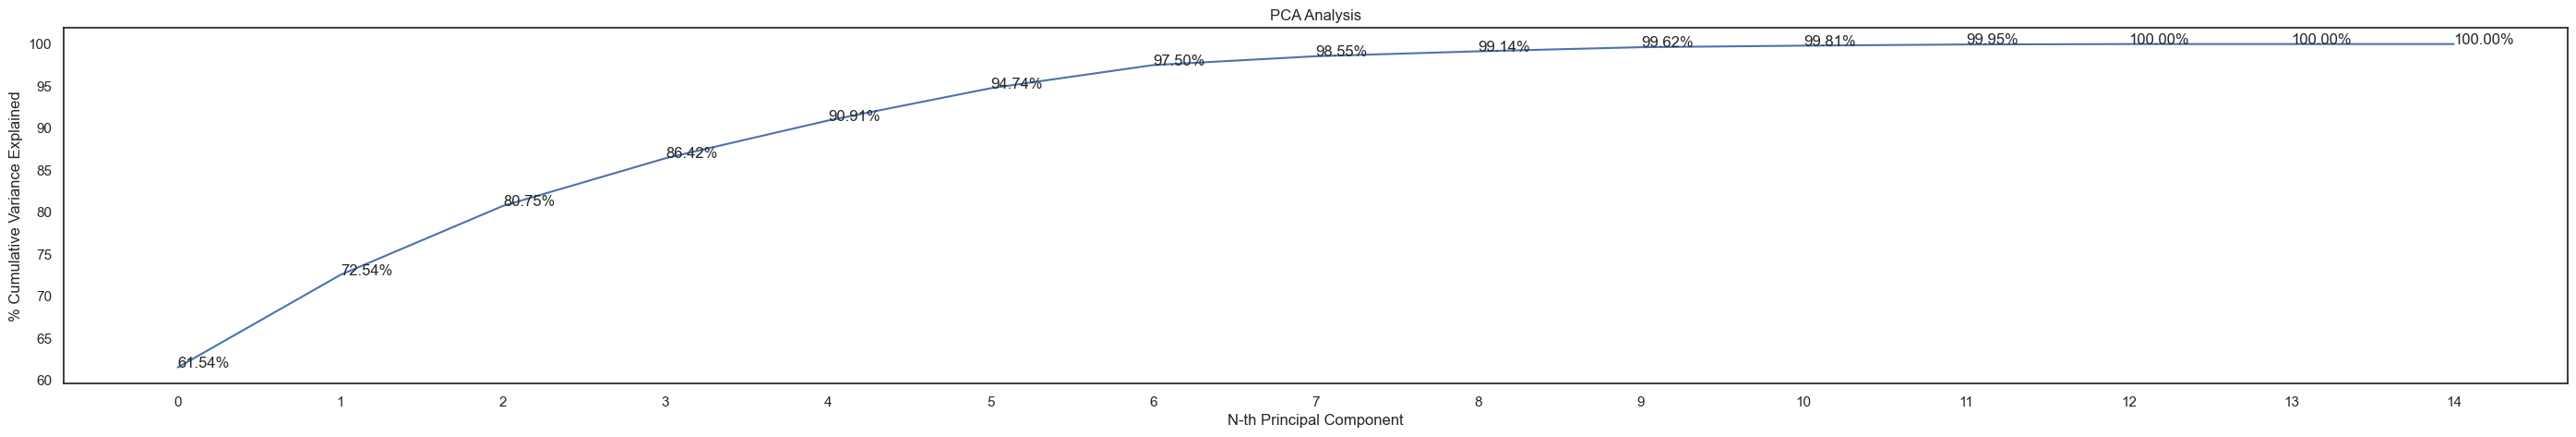

In [134]:
sns.set_style('white')

plt.plot(np.cumsum(pca.explained_variance_ratio_)*100)
plt.title('PCA Analysis')
plt.xlabel('N-th Principal Component')
plt.ylabel('% Cumulative Variance Explained')
plt.xticks(np.arange(0,total_components,1))
#ax = plt.axes()
#ax.xaxis.grid()

labels = np.cumsum(pca.explained_variance_ratio_)*100
for i in range(total_components):
  plt.text(i,labels[i],str(format(labels[i],'.2f'))+'%')

Podemos observar el porcentaje de varianza que se explica por cada componente principal. En nuestro caso el componente principal #8 explica más del 99% de varianza de los datos y es el que vamos a ocupar

In [135]:
for i in range(0, total_components):
  print("The percentage of variance explained by principal component", i+1, "is", format(pca.explained_variance_ratio_[i]*100,'.2f'),'%')

The percentage of variance explained by principal component 1 is 61.54 %
The percentage of variance explained by principal component 2 is 11.00 %
The percentage of variance explained by principal component 3 is 8.20 %
The percentage of variance explained by principal component 4 is 5.67 %
The percentage of variance explained by principal component 5 is 4.49 %
The percentage of variance explained by principal component 6 is 3.84 %
The percentage of variance explained by principal component 7 is 2.75 %
The percentage of variance explained by principal component 8 is 1.05 %
The percentage of variance explained by principal component 9 is 0.59 %
The percentage of variance explained by principal component 10 is 0.49 %
The percentage of variance explained by principal component 11 is 0.19 %
The percentage of variance explained by principal component 12 is 0.14 %
The percentage of variance explained by principal component 13 is 0.05 %
The percentage of variance explained by principal componen

Importante, antes de concatenar el nuevo dataframe con las variables transformadas, escaladas y analizadas con PCA, vamos a separar la variable de salida (DIAS_ALMONEDA) sin las transformaciones y escalamiento, ya que es importante por temas de interpretabilidad conservar la variable en sus unidades originales que son días

In [136]:
percentile_25 = df_relojes["DIAS_ALMONEDA"].quantile(0.25)
percentile_75 = df_relojes["DIAS_ALMONEDA"].quantile(0.75)
iqr = percentile_75 - percentile_25
upper_limit = percentile_75 + 1.5 * iqr
lower_limit = percentile_25 - 1.5 * iqr
IQR_outliers = df_relojes[(df_relojes["DIAS_ALMONEDA"] < lower_limit) | (df_relojes["DIAS_ALMONEDA"] > upper_limit)]
diasalmoneda_outliers = IQR_outliers['DIAS_ALMONEDA']

diasalmoneda_outliers_df = pd.DataFrame(diasalmoneda_outliers)
diasalmoneda_outliers_df.columns = ['diasalmoneda_outliers']
diasalmoneda_outliers_df

,diasalmoneda_outliers
66,727
71,408
75,492
85,448
95,703
...,...
1048518,362
1048523,360
1048532,354
1048562,348


In [128]:
#df_relojes.drop(diasalmoneda_outliers_df.index, inplace=True)

In [137]:
y= df_relojes['DIAS_ALMONEDA']

#**Conjuntar en un dataframe con transformaciones, escalamiento y PCA**

In [139]:
n = 8
#Vamos a seleccionar únicamente los primeros n componentes del PCA y los almacenamos en un nuevo dataframe
new_data = scaler_df_projected[scaler_df_projected.columns[:n]]
#Se renombran las columnas del dataframe con los nombres de los componentes principales
new_data.columns = ['PC{}'.format(i) for i in range(1,n+1)]

#Se concatena el dataframe de componentes principales, dataframe codificado one-hot, las variables binarias (categóricas) y la variable objetivo y

new_data = pd.concat([new_data.reset_index(drop=True),onehot_df.reset_index(drop=True),binary_df.reset_index(drop=True),y.reset_index(drop=True)],axis=1)


In [140]:
new_data

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,ESTADO_SUCURSAL_BAJA CALIFORNIA NORTE,ESTADO_SUCURSAL_BAJA CALIFORNIA SUR,...,SUCURSAL_0,SUCURSAL_1,SUCURSAL_2,SUCURSAL_3,SUCURSAL_4,SUCURSAL_5,SUCURSAL_6,SUCURSAL_7,SUCURSAL_8,DIAS_ALMONEDA
0,0.812735,-1.814181,0.638738,1.484528,-1.233439,-0.566588,0.414354,-2.021052,0.0,0.0,...,0,0,0,0,0,0,0,0,1,31
1,-0.890791,-1.612409,0.763566,1.539948,-1.102550,-0.441027,0.512508,-1.224245,0.0,0.0,...,0,0,0,0,0,0,0,0,1,31
2,1.301319,-1.706775,0.827715,1.745161,-1.068129,-0.316375,-0.516893,-2.344264,0.0,0.0,...,0,0,0,0,0,0,0,0,1,31
3,-3.590642,-0.706322,-0.800961,0.025471,-0.954515,-1.206674,4.279983,-3.877298,0.0,0.0,...,0,0,0,0,0,0,0,1,0,21
4,-6.868838,-0.830656,-0.449515,0.318054,-0.546366,-0.827182,3.805191,-0.950972,0.0,0.0,...,0,0,0,0,0,0,0,1,0,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
679159,2.719733,-1.087779,1.926290,-0.397498,0.247639,0.766519,-0.889125,-0.653163,0.0,0.0,...,0,0,1,1,1,0,1,0,1,20
679160,2.449231,0.059689,-0.171508,-1.914994,1.259741,1.038081,0.392547,0.047670,0.0,0.0,...,0,0,0,0,1,1,1,1,1,111
679161,3.194923,1.025713,0.940067,-1.991741,0.057458,-0.345534,-0.358578,0.018728,0.0,0.0,...,0,1,0,1,0,0,0,0,0,26
679162,1.297617,0.189724,-0.649046,0.326053,0.180996,1.043675,-0.090841,0.051932,0.0,0.0,...,1,0,0,0,1,1,1,0,1,347


In [141]:
per_miss_col = new_data.isna().mean() * 100
missing = pd.DataFrame(per_miss_col)
missing.columns = ['Percentage of missing values (%)']
missing

,Percentage of missing values (%)
PC1,0.0
PC2,0.0
PC3,0.0
PC4,0.0
PC5,0.0
...,...
SUCURSAL_5,0.0
SUCURSAL_6,0.0
SUCURSAL_7,0.0
SUCURSAL_8,0.0


In [ ]:
new_data = new_data.dropna()

In [142]:
new_data.shape

(679164, 134)

In [ ]:
new_data.to_csv('C:/Maestría Inteligencia artificial aplicada/Trimestre 7 (Proyecto integrador y TD)/Semana 6/Alhajas/new_df_afterPCA_alhajas_novaluador.csv', index=False)